 **Get Data**

In [13]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-08-20 09:26:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.008s  

2023-08-20 09:26:51 (21.2 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [14]:
import pandas as pd
# "Date" sütununun tarih olduğunu belirtiyoruz
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])

In [15]:
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [16]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [7]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


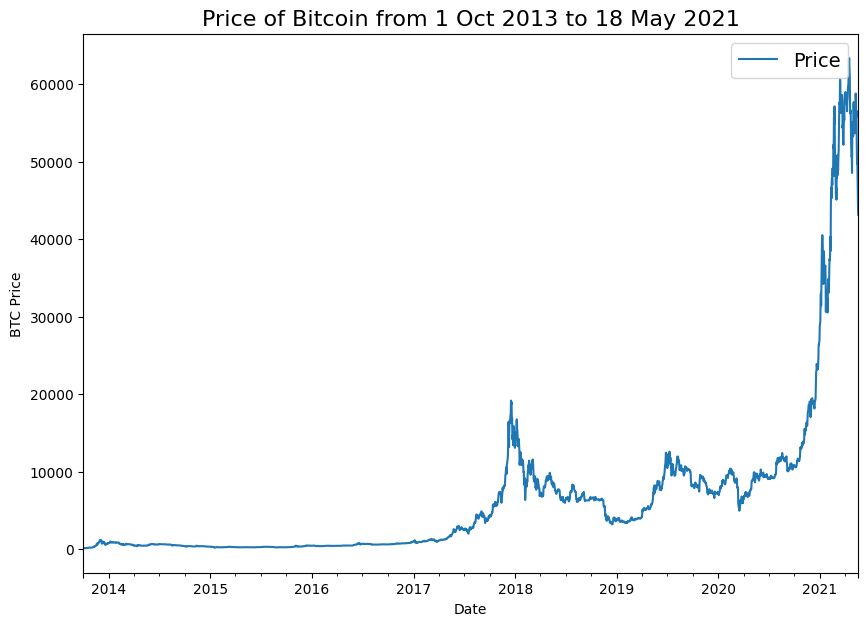

In [8]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [77]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

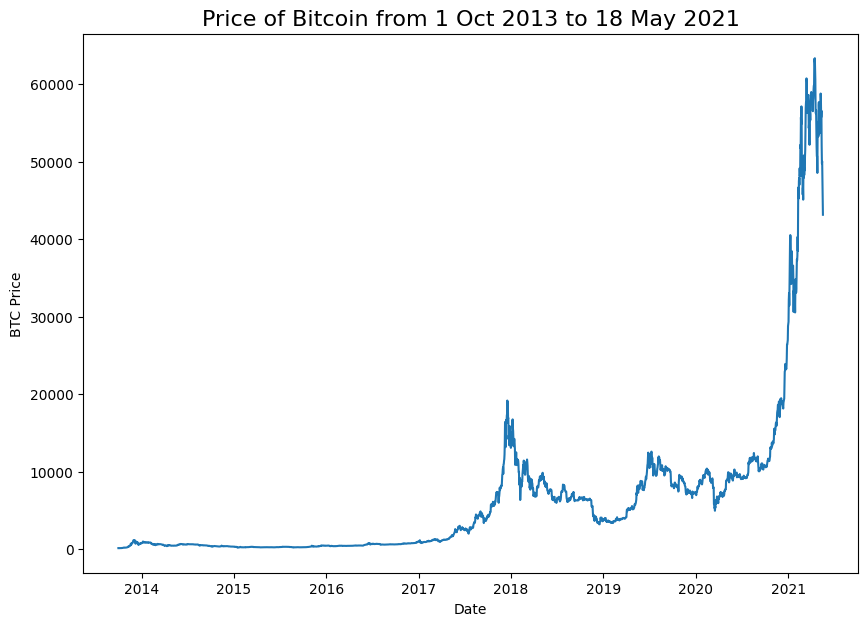

In [78]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

**Train and Test Split**

In [11]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

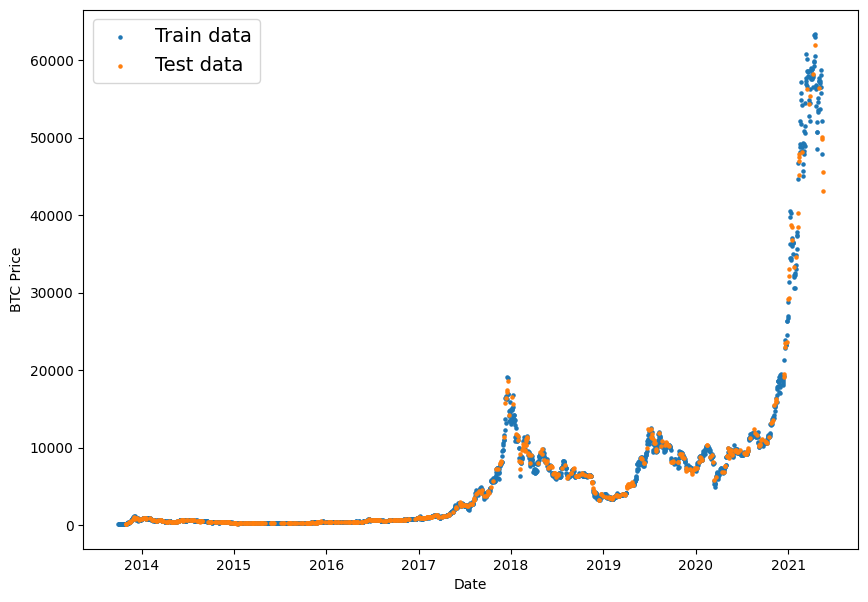

In [13]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [14]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

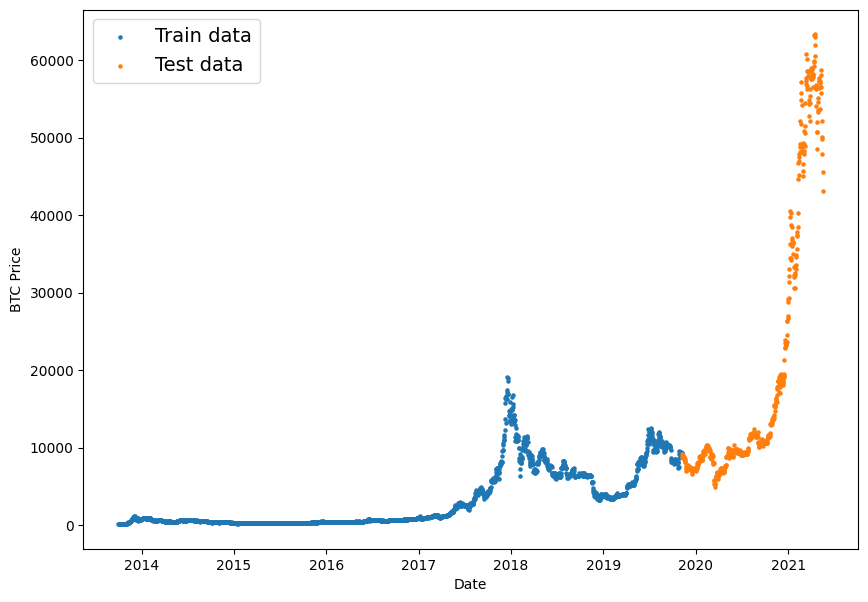

In [15]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [74]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

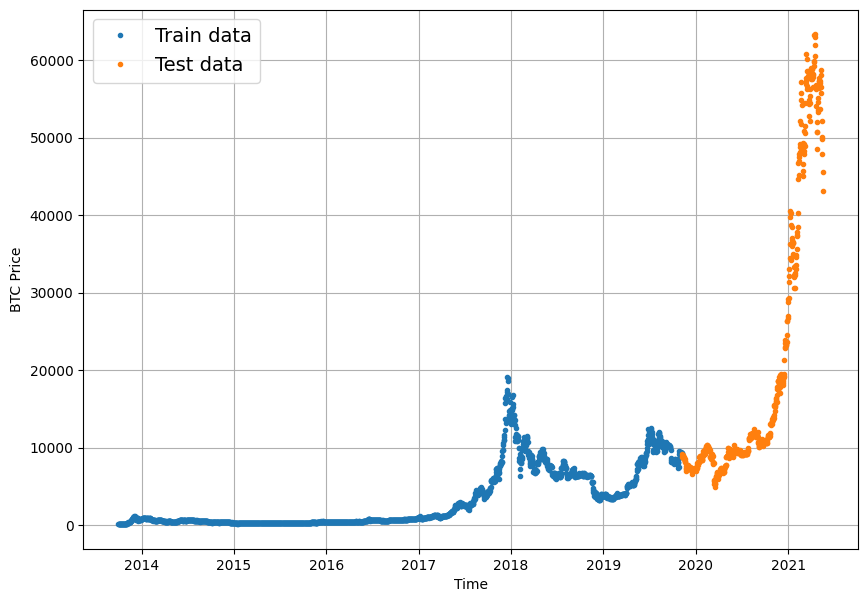

In [17]:
plt.figure(figsize=(10, 7))
#plt.subplot(2, 1, 1) # 2 satırlık subplot alanı oluşturulacak, bu kod birinci subplot'a odaklanmayı sağlar
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
#plt.subplot(2, 1, 2) # 2 satırlık subplot alanı oluşturulacak, bu kod ikinci subplot'a odaklanmayı sağlar
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
#plt.tight_layout() # subplot'lar arasındaki boşlukları ayarlamak için kullanılır
plt.show()

**Naive Model(Baseline)**

In [18]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

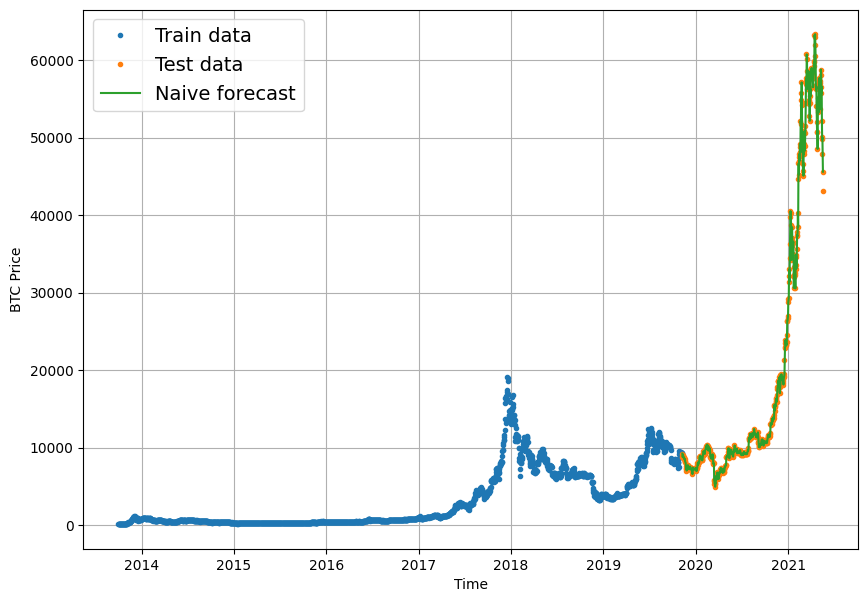

In [19]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

In [2]:
import tensorflow as tf

In [31]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [22]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [23]:
#Results of Metrics
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [24]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737222

 **Windowing our Data**

In [106]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [107]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [108]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [109]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [29]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [110]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [111]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [431.44471291]


In [112]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [113]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [114]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [115]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [116]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

**MODEL 1 : DENSE MODEL(WINDOW=7 , HORIZON=1)**

In [117]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
history_model_1= model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 1113.1534 - mae: 1113.1534 

18/18 [==============================] - 2s 76ms/step - loss: 1023.4972 - mae: 1023.4972 - val_loss: 2749.9597 - val_mae: 2749.9597
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 391.2487 - mae: 391.2487

18/18 [==============================] - 1s 32ms/step - loss: 252.6045 - mae: 252.6045 - val_loss: 1148.6249 - val_mae: 1148.6249
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 135.9863 - mae: 135.9863

18/18 [==============================] - 1s 32ms/step - loss: 174.4119 - mae: 174.4119 - val_loss: 977.3091 - val_mae: 977.3091
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 164.4615 - mae: 164.4615

18/18 [==============================] - 1s 34ms/step - loss: 164.4155 - mae: 164.4155 - val_loss: 963.3353 - val_mae: 963.3353
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 160.8898 - mae: 160.8898 - val_loss: 973.3796 - val_mae: 973.3796
Epoch 6/100
13/18 [====================>.........] - ETA: 0s - loss: 155.1660 - mae: 155.1660

18/18 [==============================] - 1s 48ms/step - loss: 157.8033 - mae: 157.8033 - val_loss: 931.8642 - val_mae: 931.8642
Epoch 7/100
13/18 [====================>.........] - ETA: 0s - loss: 159.6104 - mae: 159.6104

18/18 [==============================] - 1s 45ms/step - loss: 152.1528 - mae: 152.1528 - val_loss: 913.4886 - val_mae: 913.4886
Epoch 8/100
12/18 [===================>..........] - ETA: 0s - loss: 146.5273 - mae: 146.5273

18/18 [==============================] - 1s 42ms/step - loss: 149.9840 - mae: 149.9840 - val_loss: 897.7556 - val_mae: 897.7556
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 149.3825 - mae: 149.3825 - val_loss: 910.9681 - val_mae: 910.9681
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 145.1288 - mae: 145.1288

18/18 [==============================] - 1s 32ms/step - loss: 145.1288 - mae: 145.1288 - val_loss: 867.8594 - val_mae: 867.8594
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 141.3963 - mae: 141.3963 - val_loss: 874.6273 - val_mae: 874.6273
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 140.1650 - mae: 140.1650 - val_loss: 901.2991 - val_mae: 901.2991
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 141.1736 - mae: 141.1736 - val_loss: 868.5490 - val_mae: 868.5490
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 136.0497 - mae: 136.0497

18/18 [==============================] - 1s 31ms/step - loss: 136.0497 - mae: 136.0497 - val_loss: 842.0488 - val_mae: 842.0488
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 137.7487 - mae: 137.7487

18/18 [==============================] - 1s 31ms/step - loss: 137.1445 - mae: 137.1445 - val_loss: 820.3022 - val_mae: 820.3022
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 133.1582 - mae: 133.1582 - val_loss: 836.1983 - val_mae: 836.1983
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 131.6580 - mae: 131.6580 - val_loss: 830.9911 - val_mae: 830.9911
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 130.4959 - mae: 130.4959

18/18 [==============================] - 1s 33ms/step - loss: 130.4959 - mae: 130.4959 - val_loss: 790.2933 - val_mae: 790.2933
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 130.1477 - mae: 130.1477 - val_loss: 801.7849 - val_mae: 801.7849
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 128.8205 - mae: 128.8205 - val_loss: 791.6012 - val_mae: 791.6012
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 130.7072 - mae: 130.7072

18/18 [==============================] - 1s 32ms/step - loss: 130.7072 - mae: 130.7072 - val_loss: 784.8229 - val_mae: 784.8229
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 126.6296 - mae: 126.6296

18/18 [==============================] - 1s 33ms/step - loss: 126.3140 - mae: 126.3140 - val_loss: 773.7440 - val_mae: 773.7440
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 127.3074 - mae: 127.3074

18/18 [==============================] - 1s 32ms/step - loss: 127.3074 - mae: 127.3074 - val_loss: 760.1458 - val_mae: 760.1458
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 123.4019 - mae: 123.4019

18/18 [==============================] - 1s 32ms/step - loss: 123.4019 - mae: 123.4019 - val_loss: 744.8672 - val_mae: 744.8672
Epoch 25/100
15/18 [========================>.....] - ETA: 0s - loss: 128.0903 - mae: 128.0903

18/18 [==============================] - 1s 32ms/step - loss: 122.7840 - mae: 122.7840 - val_loss: 737.7633 - val_mae: 737.7633
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 121.8802 - mae: 121.8802

18/18 [==============================] - 1s 31ms/step - loss: 121.8802 - mae: 121.8802 - val_loss: 731.2278 - val_mae: 731.2278
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 168.2075 - mae: 168.2075

18/18 [==============================] - 1s 30ms/step - loss: 122.2326 - mae: 122.2326 - val_loss: 724.8151 - val_mae: 724.8151
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 119.9864 - mae: 119.9864

18/18 [==============================] - 1s 30ms/step - loss: 119.9864 - mae: 119.9864 - val_loss: 720.6013 - val_mae: 720.6013
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 119.3008 - mae: 119.3008

18/18 [==============================] - 1s 31ms/step - loss: 119.3008 - mae: 119.3008 - val_loss: 714.7627 - val_mae: 714.7627
Epoch 30/100
18/18 [==============================] - ETA: 0s - loss: 123.3766 - mae: 123.3766

18/18 [==============================] - 1s 31ms/step - loss: 123.3766 - mae: 123.3766 - val_loss: 710.4306 - val_mae: 710.4306
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 120.8996 - mae: 120.8996 - val_loss: 712.7724 - val_mae: 712.7724
Epoch 32/100
15/18 [========================>.....] - ETA: 0s - loss: 118.5613 - mae: 118.5613

18/18 [==============================] - 1s 32ms/step - loss: 117.8193 - mae: 117.8193 - val_loss: 709.1168 - val_mae: 709.1168
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 117.6294 - mae: 117.6294 - val_loss: 768.7509 - val_mae: 768.7509
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 119.5454 - mae: 119.5454

18/18 [==============================] - 1s 34ms/step - loss: 119.5454 - mae: 119.5454 - val_loss: 697.2838 - val_mae: 697.2838
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 115.2225 - mae: 115.2225 - val_loss: 700.4589 - val_mae: 700.4589
Epoch 36/100
12/18 [===================>..........] - ETA: 0s - loss: 116.7348 - mae: 116.7348

18/18 [==============================] - 1s 45ms/step - loss: 120.0312 - mae: 120.0312 - val_loss: 691.6466 - val_mae: 691.6466
Epoch 37/100
18/18 [==============================] - 0s 8ms/step - loss: 116.8755 - mae: 116.8755 - val_loss: 696.9802 - val_mae: 696.9802
Epoch 38/100
18/18 [==============================] - 0s 8ms/step - loss: 115.5976 - mae: 115.5976 - val_loss: 699.5485 - val_mae: 699.5485
Epoch 39/100
13/18 [====================>.........] - ETA: 0s - loss: 116.5258 - mae: 116.5258

18/18 [==============================] - 1s 46ms/step - loss: 114.5392 - mae: 114.5392 - val_loss: 684.6218 - val_mae: 684.6218
Epoch 40/100
13/18 [====================>.........] - ETA: 0s - loss: 114.2266 - mae: 114.2266

18/18 [==============================] - 1s 36ms/step - loss: 113.2450 - mae: 113.2450 - val_loss: 681.0762 - val_mae: 681.0762
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2183 - mae: 114.2183 - val_loss: 746.8404 - val_mae: 746.8404
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 121.2408 - mae: 121.2408 - val_loss: 691.3472 - val_mae: 691.3472
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 116.0073 - mae: 116.0073 - val_loss: 715.8133 - val_mae: 715.8133
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 115.9965 - mae: 115.9965 - val_loss: 684.2993 - val_mae: 684.2993
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 85.6839 - mae: 85.6839

18/18 [==============================] - 1s 30ms/step - loss: 111.7495 - mae: 111.7495 - val_loss: 675.0527 - val_mae: 675.0527
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1013 - mae: 112.1013 - val_loss: 677.5517 - val_mae: 677.5517
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8837 - mae: 111.8837 - val_loss: 712.9185 - val_mae: 712.9185
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1987 - mae: 112.1987 - val_loss: 716.0884 - val_mae: 716.0884
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 115.1158 - mae: 115.1158 - val_loss: 677.8069 - val_mae: 677.8068
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2111 - mae: 116.2111 - val_loss: 698.9158 - val_mae: 698.9158
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 92.7402 - mae: 92.7402

18/18 [==============================] - 1s 31ms/step - loss: 112.3999 - mae: 112.3999 - val_loss: 673.6357 - val_mae: 673.6357
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 119.6992 - mae: 119.6992

18/18 [==============================] - 1s 30ms/step - loss: 114.4932 - mae: 114.4932 - val_loss: 670.9558 - val_mae: 670.9558
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9745 - mae: 112.9745 - val_loss: 714.8699 - val_mae: 714.8699
Epoch 54/100
16/18 [=========================>....] - ETA: 0s - loss: 113.8120 - mae: 113.8120

18/18 [==============================] - 1s 33ms/step - loss: 113.6132 - mae: 113.6132 - val_loss: 657.5211 - val_mae: 657.5210
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 117.6142 - mae: 117.6142 - val_loss: 663.1111 - val_mae: 663.1111
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2083 - mae: 112.2083 - val_loss: 962.6242 - val_mae: 962.6242
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 138.5271 - mae: 138.5271 - val_loss: 822.9885 - val_mae: 822.9885
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 120.5097 - mae: 120.5097 - val_loss: 689.9599 - val_mae: 689.9599
Epoch 59/100
18/18 [==============================] - ETA: 0s - loss: 112.8090 - mae: 112.8090

18/18 [==============================] - 1s 70ms/step - loss: 112.8090 - mae: 112.8090 - val_loss: 653.7078 - val_mae: 653.7078
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2835 - mae: 110.2835 - val_loss: 674.8318 - val_mae: 674.8318
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0273 - mae: 110.0273 - val_loss: 657.0311 - val_mae: 657.0311
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1999 - mae: 110.1999 - val_loss: 691.8723 - val_mae: 691.8723
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 114.4732 - mae: 114.4732 - val_loss: 703.8666 - val_mae: 703.8666
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1112 - mae: 111.1112 - val_loss: 661.8615 - val_mae: 661.8615
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 110.3321 - mae: 110.3321 - val_loss: 660.9583 - val_mae: 660.9583
Epoch 66/100
17/18 [============

18/18 [==============================] - 1s 32ms/step - loss: 108.7572 - mae: 108.7572 - val_loss: 648.3498 - val_mae: 648.3498
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4387 - mae: 107.4387 - val_loss: 675.1826 - val_mae: 675.1826
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8812 - mae: 115.8812 - val_loss: 792.6086 - val_mae: 792.6086
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 126.3903 - mae: 126.3903 - val_loss: 677.4243 - val_mae: 677.4243
Epoch 70/100
15/18 [========================>.....] - ETA: 0s - loss: 129.7080 - mae: 129.7080

18/18 [==============================] - 1s 32ms/step - loss: 131.3213 - mae: 131.3213 - val_loss: 647.7268 - val_mae: 647.7268
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7157 - mae: 113.7157 - val_loss: 667.0272 - val_mae: 667.0272
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6418 - mae: 108.6418 - val_loss: 650.8152 - val_mae: 650.8152
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2769 - mae: 112.2769 - val_loss: 684.9521 - val_mae: 684.9521
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 108.6898 - mae: 108.6898 - val_loss: 670.0320 - val_mae: 670.0320
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6113 - mae: 112.6113 - val_loss: 764.5889 - val_mae: 764.5889
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4674 - mae: 114.4674 - val_loss: 671.1116 - val_mae: 671.1116
Epoch 77/100
 1/18 [>...........

18/18 [==============================] - 1s 31ms/step - loss: 108.6579 - mae: 108.6579 - val_loss: 646.6436 - val_mae: 646.6436
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4706 - mae: 109.4706 - val_loss: 664.3800 - val_mae: 664.3800
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 110.4806 - mae: 110.4806 - val_loss: 655.9337 - val_mae: 655.9337
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0090 - mae: 107.0090 - val_loss: 672.6624 - val_mae: 672.6624
Epoch 81/100
14/18 [======================>.......] - ETA: 0s - loss: 106.9158 - mae: 106.9158

18/18 [==============================] - 1s 32ms/step - loss: 107.9297 - mae: 107.9297 - val_loss: 644.7733 - val_mae: 644.7733
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 117.3488 - mae: 117.3488 - val_loss: 660.4412 - val_mae: 660.4412
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8154 - mae: 112.8154 - val_loss: 768.3506 - val_mae: 768.3506
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 113.8407 - mae: 113.8407 - val_loss: 655.0255 - val_mae: 655.0255
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1934 - mae: 108.1934 - val_loss: 676.1609 - val_mae: 676.1609
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 108.5198 - mae: 108.5198 - val_loss: 649.1299 - val_mae: 649.1299
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 105.7703 - mae: 105.7703 - val_loss: 674.9413 - val_mae: 674.9413
Epoch 88/100
18/18 [============

18/18 [==============================] - 1s 49ms/step - loss: 106.2673 - mae: 106.2673 - val_loss: 642.0146 - val_mae: 642.0146
Epoch 90/100
18/18 [==============================] - 0s 8ms/step - loss: 106.1589 - mae: 106.1589 - val_loss: 673.2527 - val_mae: 673.2527
Epoch 91/100
18/18 [==============================] - 0s 8ms/step - loss: 113.7806 - mae: 113.7806 - val_loss: 745.0637 - val_mae: 745.0637
Epoch 92/100
18/18 [==============================] - 0s 8ms/step - loss: 108.5583 - mae: 108.5583 - val_loss: 672.1976 - val_mae: 672.1976
Epoch 93/100
18/18 [==============================] - 0s 8ms/step - loss: 114.4714 - mae: 114.4714 - val_loss: 683.8818 - val_mae: 683.8818
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 111.8146 - mae: 111.8146 - val_loss: 678.9752 - val_mae: 678.9752
Epoch 95/100
14/18 [======================>.......] - ETA: 0s - loss: 107.0441 - mae: 107.0441

18/18 [==============================] - 1s 47ms/step - loss: 106.4302 - mae: 106.4302 - val_loss: 641.3785 - val_mae: 641.3785
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2254 - mae: 108.2254 - val_loss: 685.4677 - val_mae: 685.4677
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 107.2242 - mae: 107.2242 - val_loss: 670.6562 - val_mae: 670.6562
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 106.4477 - mae: 106.4477 - val_loss: 642.6967 - val_mae: 642.6967
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 107.3982 - mae: 107.3982 - val_loss: 641.9932 - val_mae: 641.9932
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0982 - mae: 109.0982 - val_loss: 711.0590 - val_mae: 711.0590


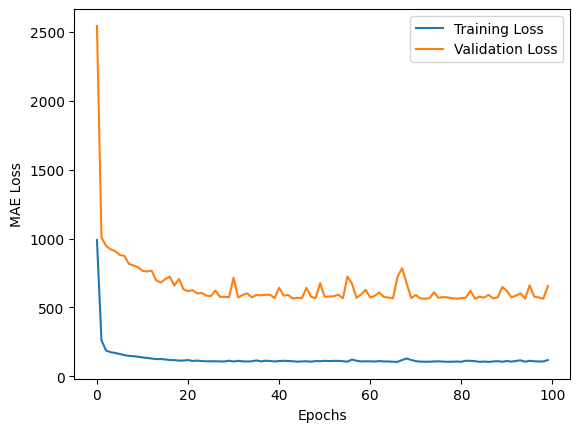

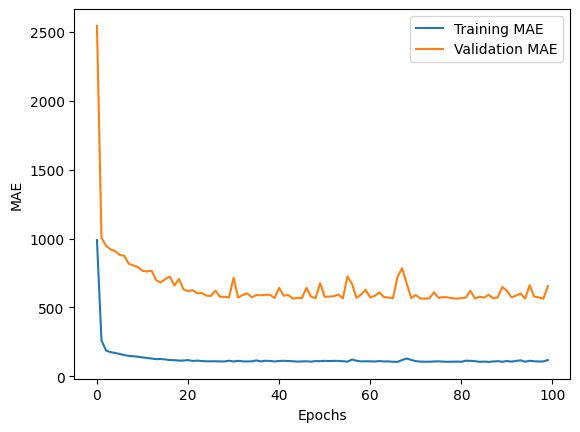

In [38]:
import matplotlib.pyplot as plt

# Eğitimdeki kayıp değerlerini çizin
plt.plot(history_model_1.history['loss'], label='Training Loss')
plt.plot(history_model_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.legend()
plt.show()

# Eğitimdeki metrik değerlerini çizin
plt.plot(history_model_1.history['mae'], label='Training MAE')
plt.plot(history_model_1.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [39]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 654.6741 - mae: 654.6741


[654.6741333007812, 654.6741333007812]

In [40]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 563.3260 - mae: 563.3260


[563.3259887695312, 563.3259887695312]

In [26]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [42]:
#Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8811.119, 8781.961, 9049.831, 8736.728, 8756.367, 8730.968,
        8662.277, 8517.944, 8458.034, 8528.217], dtype=float32)>)

In [43]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 563.3259,
 'mse': 1140646.0,
 'rmse': 1068.0103,
 'mape': 2.5259829,
 'mase': 0.98960763}

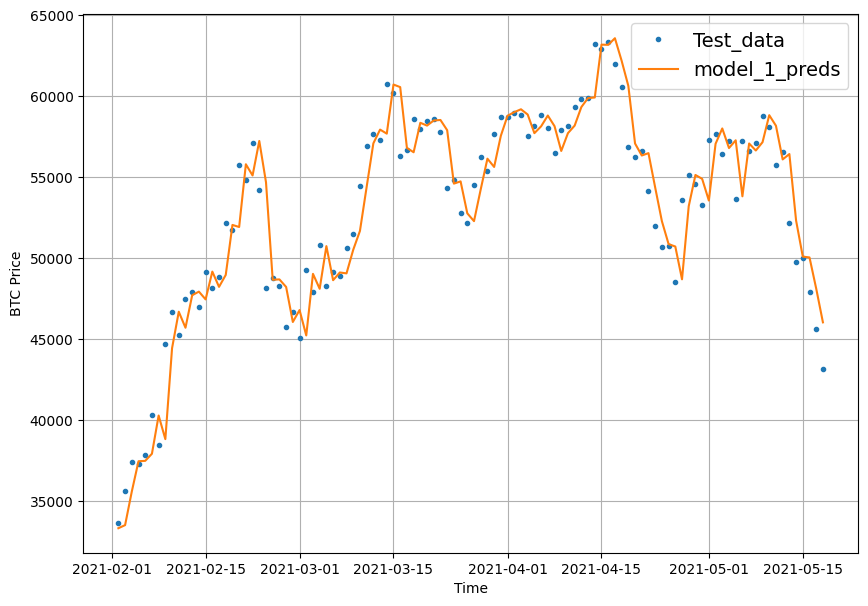

In [44]:
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

**MODEL 2 : DENSE MODEL(WINDOW= 30 , HORIZON=1)**

In [45]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [46]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [47]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [48]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_model_2=model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
10/18 [===============>..............] - ETA: 0s - loss: 1923.1246 - mae: 1923.1246 

18/18 [==============================] - 2s 58ms/step - loss: 1503.9077 - mae: 1503.9077 - val_loss: 1910.1554 - val_mae: 1910.1554
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 437.3626 - mae: 437.3626 - val_loss: 2086.8794 - val_mae: 2086.8794
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 320.5512 - mae: 320.5512

18/18 [==============================] - 1s 31ms/step - loss: 321.7068 - mae: 321.7068 - val_loss: 1482.3326 - val_mae: 1482.3326
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 274.5718 - mae: 274.5718

18/18 [==============================] - 1s 31ms/step - loss: 274.5718 - mae: 274.5718 - val_loss: 1431.0729 - val_mae: 1431.0729
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 218.0557 - mae: 218.0557

18/18 [==============================] - 1s 30ms/step - loss: 236.4746 - mae: 236.4746 - val_loss: 1273.8057 - val_mae: 1273.8057
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 301.7234 - mae: 301.7234

18/18 [==============================] - 1s 31ms/step - loss: 222.7626 - mae: 222.7626 - val_loss: 1210.0586 - val_mae: 1210.0586
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 220.6885 - mae: 220.6885

18/18 [==============================] - 1s 31ms/step - loss: 208.9568 - mae: 208.9568 - val_loss: 1154.1488 - val_mae: 1154.1488
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 197.0157 - mae: 197.0157

18/18 [==============================] - 1s 30ms/step - loss: 211.1993 - mae: 211.1993 - val_loss: 1148.1193 - val_mae: 1148.1193
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 186.9163 - mae: 186.9163

18/18 [==============================] - 1s 32ms/step - loss: 189.3124 - mae: 189.3124 - val_loss: 1122.2426 - val_mae: 1122.2426
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 180.7909 - mae: 180.7909

18/18 [==============================] - 1s 46ms/step - loss: 180.7909 - mae: 180.7909 - val_loss: 1022.8191 - val_mae: 1022.8191
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 190.6133 - mae: 190.6133

18/18 [==============================] - 1s 30ms/step - loss: 171.4229 - mae: 171.4229 - val_loss: 988.4244 - val_mae: 988.4244
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 167.0022 - mae: 167.0022 - val_loss: 993.9715 - val_mae: 993.9715
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 163.5791 - mae: 163.5791 - val_loss: 1011.2115 - val_mae: 1011.2115
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 222.1886 - mae: 222.1886

18/18 [==============================] - 1s 30ms/step - loss: 168.5895 - mae: 168.5895 - val_loss: 930.6233 - val_mae: 930.6233
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 166.1745 - mae: 166.1745 - val_loss: 997.0314 - val_mae: 997.0314
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 186.8822 - mae: 186.8822

18/18 [==============================] - 1s 30ms/step - loss: 166.8093 - mae: 166.8093 - val_loss: 896.2224 - val_mae: 896.2224
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 158.7574 - mae: 158.7574 - val_loss: 1015.2773 - val_mae: 1015.2773
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 153.2748 - mae: 153.2748 - val_loss: 1184.4514 - val_mae: 1184.4514
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 171.0503 - mae: 171.0503 - val_loss: 1572.2357 - val_mae: 1572.2357
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 294.3763 - mae: 294.3763

18/18 [==============================] - 1s 30ms/step - loss: 202.0824 - mae: 202.0824 - val_loss: 881.6790 - val_mae: 881.6790
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 159.2937 - mae: 159.2937

18/18 [==============================] - 1s 30ms/step - loss: 157.4996 - mae: 157.4996 - val_loss: 819.7748 - val_mae: 819.7748
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 154.2722 - mae: 154.2722 - val_loss: 980.0684 - val_mae: 980.0684
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 155.3048 - mae: 155.3048 - val_loss: 1148.2987 - val_mae: 1148.2987
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 153.5738 - mae: 153.5738 - val_loss: 901.6041 - val_mae: 901.6041
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 147.2309 - mae: 147.2309 - val_loss: 906.9713 - val_mae: 906.9713
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 125.9367 - mae: 125.9367

18/18 [==============================] - 1s 31ms/step - loss: 139.9175 - mae: 139.9175 - val_loss: 798.0981 - val_mae: 798.0981
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 138.1711 - mae: 138.1711

18/18 [==============================] - 1s 31ms/step - loss: 138.1711 - mae: 138.1711 - val_loss: 779.7399 - val_mae: 779.7399
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 139.2969 - mae: 139.2969 - val_loss: 878.7336 - val_mae: 878.7336
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 149.6138 - mae: 149.6138 - val_loss: 863.9845 - val_mae: 863.9845
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 143.2599 - mae: 143.2599 - val_loss: 1157.2719 - val_mae: 1157.2719
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 144.8797 - mae: 144.8797 - val_loss: 826.0731 - val_mae: 826.0731
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 153.5215 - mae: 153.5215

18/18 [==============================] - 1s 37ms/step - loss: 153.5215 - mae: 153.5215 - val_loss: 750.8962 - val_mae: 750.8962
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 138.4860 - mae: 138.4860 - val_loss: 833.1154 - val_mae: 833.1154
Epoch 34/100
13/18 [====================>.........] - ETA: 0s - loss: 137.0557 - mae: 137.0557

18/18 [==============================] - 1s 44ms/step - loss: 138.2933 - mae: 138.2933 - val_loss: 741.7704 - val_mae: 741.7704
Epoch 35/100
14/18 [======================>.......] - ETA: 0s - loss: 142.0357 - mae: 142.0357

18/18 [==============================] - 1s 45ms/step - loss: 141.0326 - mae: 141.0326 - val_loss: 735.7627 - val_mae: 735.7627
Epoch 36/100
18/18 [==============================] - 0s 8ms/step - loss: 134.5329 - mae: 134.5329 - val_loss: 770.4932 - val_mae: 770.4932
Epoch 37/100
14/18 [======================>.......] - ETA: 0s - loss: 134.5871 - mae: 134.5871

18/18 [==============================] - 1s 32ms/step - loss: 132.4371 - mae: 132.4371 - val_loss: 719.6208 - val_mae: 719.6208
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 130.4687 - mae: 130.4687 - val_loss: 719.9380 - val_mae: 719.9380
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 133.7669 - mae: 133.7669 - val_loss: 978.2156 - val_mae: 978.2156
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 161.8070 - mae: 161.8070 - val_loss: 749.5106 - val_mae: 749.5106
Epoch 41/100
17/18 [===========================>..] - ETA: 0s - loss: 158.9335 - mae: 158.9335

18/18 [==============================] - 1s 31ms/step - loss: 158.4310 - mae: 158.4310 - val_loss: 707.0140 - val_mae: 707.0140
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 133.6469 - mae: 133.6469 - val_loss: 737.9753 - val_mae: 737.9753
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 142.3743 - mae: 142.3743 - val_loss: 711.4598 - val_mae: 711.4598
Epoch 44/100
17/18 [===========================>..] - ETA: 0s - loss: 134.8851 - mae: 134.8851

18/18 [==============================] - 1s 32ms/step - loss: 135.1432 - mae: 135.1432 - val_loss: 703.8432 - val_mae: 703.8432
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 128.6105 - mae: 128.6105

18/18 [==============================] - 1s 30ms/step - loss: 125.9355 - mae: 125.9355 - val_loss: 703.4749 - val_mae: 703.4749
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 105.0810 - mae: 105.0810

18/18 [==============================] - 1s 30ms/step - loss: 128.2822 - mae: 128.2822 - val_loss: 702.1257 - val_mae: 702.1257
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 125.8056 - mae: 125.8056 - val_loss: 726.0629 - val_mae: 726.0629
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 126.8346 - mae: 126.8346 - val_loss: 729.8199 - val_mae: 729.8199
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 121.4408 - mae: 121.4408

18/18 [==============================] - 1s 29ms/step - loss: 125.0770 - mae: 125.0770 - val_loss: 683.5505 - val_mae: 683.5505
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 131.9233 - mae: 131.9233 - val_loss: 742.2653 - val_mae: 742.2653
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 124.3133 - mae: 124.3133 - val_loss: 931.6726 - val_mae: 931.6726
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 183.5928 - mae: 183.5928

18/18 [==============================] - 1s 46ms/step - loss: 139.7438 - mae: 139.7438 - val_loss: 680.4959 - val_mae: 680.4959
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 125.0691 - mae: 125.0691 - val_loss: 817.4583 - val_mae: 817.4583
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 129.3267 - mae: 129.3267 - val_loss: 913.7567 - val_mae: 913.7567
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 142.7402 - mae: 142.7402 - val_loss: 980.2533 - val_mae: 980.2533
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 159.1067 - mae: 159.1067 - val_loss: 688.5155 - val_mae: 688.5155
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 129.7994 - mae: 129.7994 - val_loss: 720.1152 - val_mae: 720.1152
Epoch 58/100
18/18 [==============================] - ETA: 0s - loss: 132.5898 - mae: 132.5898

18/18 [==============================] - 1s 31ms/step - loss: 132.5898 - mae: 132.5898 - val_loss: 670.5139 - val_mae: 670.5139
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 155.5966 - mae: 155.5966 - val_loss: 797.4573 - val_mae: 797.4573
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 152.3215 - mae: 152.3215 - val_loss: 693.8625 - val_mae: 693.8625
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 123.7162 - mae: 123.7162 - val_loss: 732.7288 - val_mae: 732.7288
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 100.5415 - mae: 100.5415

18/18 [==============================] - 1s 31ms/step - loss: 122.7518 - mae: 122.7518 - val_loss: 663.6128 - val_mae: 663.6128
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 121.6851 - mae: 121.6851 - val_loss: 668.3693 - val_mae: 668.3693
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 90.2606 - mae: 90.2606

18/18 [==============================] - 1s 30ms/step - loss: 125.4960 - mae: 125.4960 - val_loss: 653.4837 - val_mae: 653.4837
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 139.2701 - mae: 139.2701 - val_loss: 733.9736 - val_mae: 733.9736
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 125.7989 - mae: 125.7989 - val_loss: 659.1364 - val_mae: 659.1364
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 118.8981 - mae: 118.8981 - val_loss: 669.8763 - val_mae: 669.8763
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 118.9468 - mae: 118.9468 - val_loss: 717.3541 - val_mae: 717.3541
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 120.4468 - mae: 120.4468 - val_loss: 830.1202 - val_mae: 830.1202
Epoch 70/100
18/18 [==============================] - ETA: 0s - loss: 144.1883 - mae: 144.1883

18/18 [==============================] - 1s 29ms/step - loss: 144.1883 - mae: 144.1883 - val_loss: 651.0903 - val_mae: 651.0903
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 133.9839 - mae: 133.9839 - val_loss: 1031.7498 - val_mae: 1031.7498
Epoch 72/100
18/18 [==============================] - ETA: 0s - loss: 137.5659 - mae: 137.5659

18/18 [==============================] - 1s 29ms/step - loss: 137.5659 - mae: 137.5659 - val_loss: 647.2131 - val_mae: 647.2131
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 123.0647 - mae: 123.0647 - val_loss: 652.5116 - val_mae: 652.5116
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 123.8463 - mae: 123.8463 - val_loss: 717.6884 - val_mae: 717.6884
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 147.8131 - mae: 147.8131 - val_loss: 701.4327 - val_mae: 701.4327
Epoch 76/100
18/18 [==============================] - ETA: 0s - loss: 124.0619 - mae: 124.0619

18/18 [==============================] - 1s 31ms/step - loss: 124.0619 - mae: 124.0619 - val_loss: 641.9094 - val_mae: 641.9094
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 125.1594 - mae: 125.1594 - val_loss: 680.8024 - val_mae: 680.8024
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 128.6573 - mae: 128.6573 - val_loss: 645.8132 - val_mae: 645.8132
Epoch 79/100
18/18 [==============================] - 0s 8ms/step - loss: 129.2502 - mae: 129.2502 - val_loss: 778.5311 - val_mae: 778.5311
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 137.6773 - mae: 137.6773 - val_loss: 664.8282 - val_mae: 664.8282
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 116.2429 - mae: 116.2429 - val_loss: 688.6113 - val_mae: 688.6113
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 121.8878 - mae: 121.8878 - val_loss: 812.5526 - val_mae: 812.5526
Epoch 83/100
18/18 [============

18/18 [==============================] - 1s 46ms/step - loss: 122.7309 - mae: 122.7309 - val_loss: 636.6055 - val_mae: 636.6055
Epoch 87/100
18/18 [==============================] - 0s 8ms/step - loss: 121.8347 - mae: 121.8347 - val_loss: 637.4740 - val_mae: 637.4740
Epoch 88/100
18/18 [==============================] - 0s 7ms/step - loss: 125.3844 - mae: 125.3844 - val_loss: 887.1082 - val_mae: 887.1082
Epoch 89/100
18/18 [==============================] - 0s 9ms/step - loss: 131.5439 - mae: 131.5439 - val_loss: 959.6413 - val_mae: 959.6413
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 130.7628 - mae: 130.7628 - val_loss: 709.4686 - val_mae: 709.4686
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 118.8878 - mae: 118.8878 - val_loss: 649.3157 - val_mae: 649.3157
Epoch 92/100
14/18 [======================>.......] - ETA: 0s - loss: 126.0248 - mae: 126.0248

18/18 [==============================] - 1s 34ms/step - loss: 121.2254 - mae: 121.2254 - val_loss: 635.4846 - val_mae: 635.4846
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 134.4374 - mae: 134.4374 - val_loss: 747.3035 - val_mae: 747.3035
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 121.8748 - mae: 121.8748 - val_loss: 689.0887 - val_mae: 689.0887
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 123.2332 - mae: 123.2332 - val_loss: 643.1855 - val_mae: 643.1855
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 124.8526 - mae: 124.8526 - val_loss: 640.6224 - val_mae: 640.6224
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 121.7607 - mae: 121.7607 - val_loss: 755.9586 - val_mae: 755.9586
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 131.1680 - mae: 131.1680 - val_loss: 654.3005 - val_mae: 654.3005
Epoch 99/100
18/18 [============

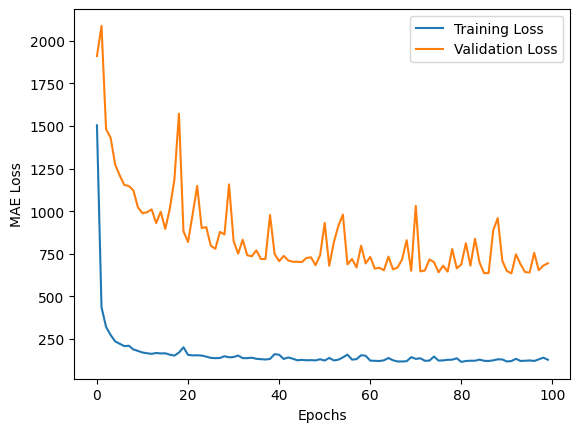

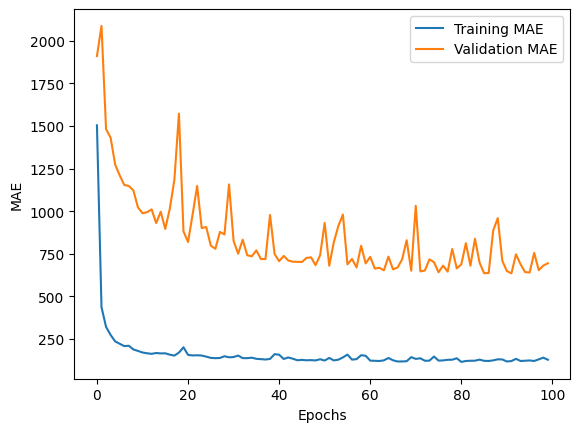

In [49]:
import matplotlib.pyplot as plt

# Eğitimdeki kayıp değerlerini çizin
plt.plot(history_model_2.history['loss'], label='Training Loss')
plt.plot(history_model_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.legend()
plt.show()

# Eğitimdeki metrik değerlerini çizin
plt.plot(history_model_2.history['mae'], label='Training MAE')
plt.plot(history_model_2.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [50]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 694.7581 - mae: 694.7581


[694.7581176757812, 694.7581176757812]

In [51]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 635.4846 - mae: 635.4846


[635.484619140625, 635.484619140625]

In [52]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [53]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 635.4846,
 'mse': 1374359.8,
 'rmse': 1172.3309,
 'mape': 2.8653667,
 'mase': 1.1108334}

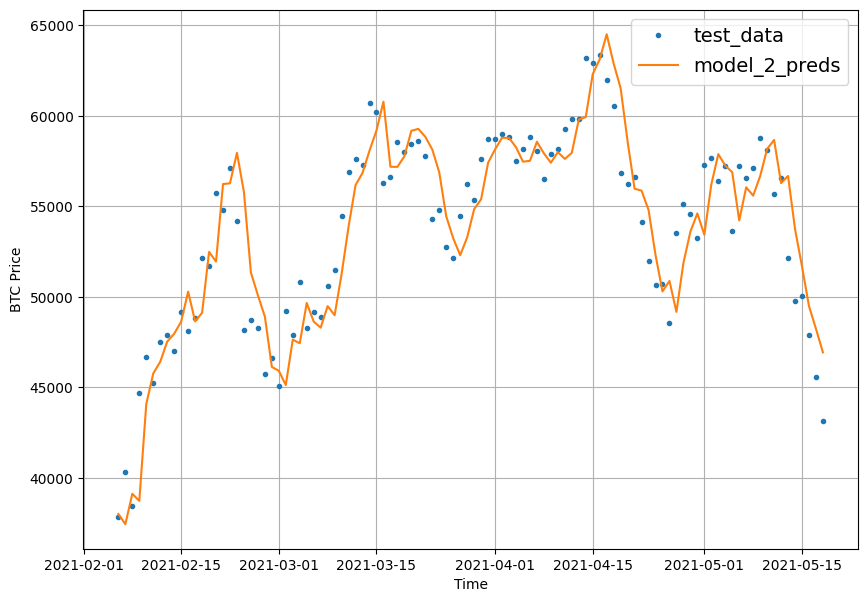

In [54]:
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

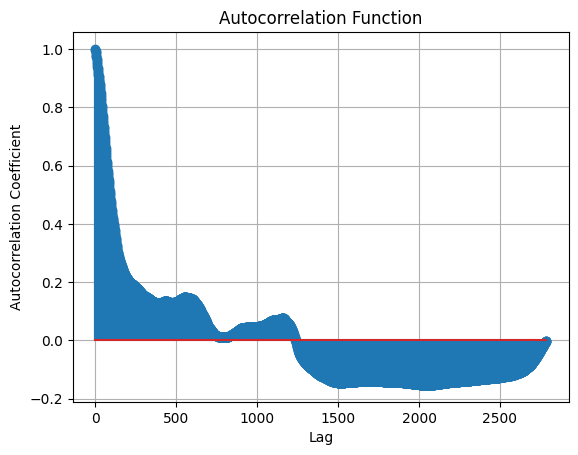

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def autocorrelation(data):
    """
    Time series autocorrelation function.

    Parameters:
        data (array-like): Time series data.

    Returns:
        acf (array-like): Array of autocorrelation coefficients.
    """
    data = np.asarray(data)
    n = len(data)
    mean = np.mean(data)
    data = data - mean
    autocovariance = np.correlate(data, data, mode='full')
    acf = autocovariance[n-1:] / autocovariance[n-1]
    return acf

# Example usage:
# Generate a sample time series data


# Calculate the autocorrelation
acf_values = autocorrelation(prices)

# Plot the autocorrelation function
plt.stem(range(len(acf_values)), acf_values)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation Coefficient')
plt.title('Autocorrelation Function')
plt.grid(True)
plt.show()


**Model 3: Dense (window = 30, horizon = 7)**

In [56]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [57]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [58]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_model_3=model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 15s - loss: 4173.0825 - mae: 4173.0825

18/18 [==============================] - 2s 38ms/step - loss: 1864.0155 - mae: 1864.0155 - val_loss: 3069.2139 - val_mae: 3069.2139
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 521.7550 - mae: 521.7550

18/18 [==============================] - 1s 45ms/step - loss: 544.5808 - mae: 544.5808 - val_loss: 2707.0833 - val_mae: 2707.0833
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 415.2442 - mae: 415.2442

18/18 [==============================] - 1s 32ms/step - loss: 418.4007 - mae: 418.4007 - val_loss: 2278.4756 - val_mae: 2278.4756
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 384.3041 - mae: 384.3041

18/18 [==============================] - 1s 31ms/step - loss: 384.3041 - mae: 384.3041 - val_loss: 2034.4941 - val_mae: 2034.4941
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 359.2750 - mae: 359.2750 - val_loss: 2078.1699 - val_mae: 2078.1699
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 301.5284 - mae: 301.5284

18/18 [==============================] - 1s 31ms/step - loss: 342.8075 - mae: 342.8075 - val_loss: 1787.6493 - val_mae: 1787.6493
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 322.7194 - mae: 322.7194

18/18 [==============================] - 1s 31ms/step - loss: 320.5559 - mae: 320.5559 - val_loss: 1621.9703 - val_mae: 1621.9703
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 312.3586 - mae: 312.3586 - val_loss: 1652.1923 - val_mae: 1652.1923
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 302.0388 - mae: 302.0388 - val_loss: 1696.7620 - val_mae: 1696.7620
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 304.7100 - mae: 304.7100

18/18 [==============================] - 1s 36ms/step - loss: 304.7100 - mae: 304.7100 - val_loss: 1582.2236 - val_mae: 1582.2236
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 293.9432 - mae: 293.9432

18/18 [==============================] - 1s 44ms/step - loss: 290.5210 - mae: 290.5210 - val_loss: 1492.0505 - val_mae: 1492.0505
Epoch 12/100
18/18 [==============================] - 0s 10ms/step - loss: 276.2212 - mae: 276.2212 - val_loss: 1592.0146 - val_mae: 1592.0146
Epoch 13/100
13/18 [====================>.........] - ETA: 0s - loss: 264.9555 - mae: 264.9555

18/18 [==============================] - 1s 43ms/step - loss: 276.1954 - mae: 276.1954 - val_loss: 1462.3435 - val_mae: 1462.3435
Epoch 14/100
13/18 [====================>.........] - ETA: 0s - loss: 262.3372 - mae: 262.3372

18/18 [==============================] - 1s 36ms/step - loss: 275.6281 - mae: 275.6281 - val_loss: 1454.9630 - val_mae: 1454.9630
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 268.2639 - mae: 268.2639 - val_loss: 1509.1490 - val_mae: 1509.1490
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 266.9683 - mae: 266.9683 - val_loss: 1476.8497 - val_mae: 1476.8497
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 263.8764 - mae: 263.8764 - val_loss: 1520.9530 - val_mae: 1520.9530
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 261.9736 - mae: 261.9736 - val_loss: 1588.9512 - val_mae: 1588.9512
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 260.5728 - mae: 260.5728 - val_loss: 1540.4730 - val_mae: 1540.4730
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 246.6108 - mae: 246.6108

18/18 [==============================] - 1s 31ms/step - loss: 264.3138 - mae: 264.3138 - val_loss: 1436.3850 - val_mae: 1436.3850
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 256.5093 - mae: 256.5093

18/18 [==============================] - 1s 30ms/step - loss: 255.0885 - mae: 255.0885 - val_loss: 1432.5986 - val_mae: 1432.5986
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 255.8871 - mae: 255.8871

18/18 [==============================] - 1s 31ms/step - loss: 255.8871 - mae: 255.8871 - val_loss: 1410.6287 - val_mae: 1410.6287
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 274.3183 - mae: 274.3183

18/18 [==============================] - 1s 30ms/step - loss: 261.8720 - mae: 261.8720 - val_loss: 1369.5052 - val_mae: 1369.5052
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 264.3060 - mae: 264.3060 - val_loss: 1407.5953 - val_mae: 1407.5953
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 257.2545 - mae: 257.2545 - val_loss: 1496.2130 - val_mae: 1496.2130
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 253.7703 - mae: 253.7703 - val_loss: 1378.0364 - val_mae: 1378.0364
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 251.8618 - mae: 251.8618 - val_loss: 1412.8514 - val_mae: 1412.8514
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 248.7735 - mae: 248.7735 - val_loss: 1471.8738 - val_mae: 1471.8738
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 248.6758 - mae: 248.6758 - val_loss: 1381.6543 - val_mae: 1381.6543
Epoch 30/100
18/18

18/18 [==============================] - 1s 29ms/step - loss: 246.5059 - mae: 246.5059 - val_loss: 1334.5328 - val_mae: 1334.5328
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 246.1159 - mae: 246.1159 - val_loss: 1420.8461 - val_mae: 1420.8461
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 249.2461 - mae: 249.2461 - val_loss: 1411.8652 - val_mae: 1411.8652
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 247.2750 - mae: 247.2750 - val_loss: 1397.7014 - val_mae: 1397.7014
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 257.4131 - mae: 257.4131 - val_loss: 1382.2487 - val_mae: 1382.2487
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 243.6441 - mae: 243.6441 - val_loss: 1390.3872 - val_mae: 1390.3872
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 239.6731 - mae: 239.6731 - val_loss: 1377.2230 - val_mae: 1377.2230
Epoch 40/100
18/18

18/18 [==============================] - 1s 34ms/step - loss: 237.3968 - mae: 237.3968 - val_loss: 1304.0394 - val_mae: 1304.0394
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 243.6750 - mae: 243.6750 - val_loss: 1337.1306 - val_mae: 1337.1306
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 238.8375 - mae: 238.8375 - val_loss: 1510.4780 - val_mae: 1510.4780
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 244.3431 - mae: 244.3431 - val_loss: 1310.2665 - val_mae: 1310.2665
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 237.9186 - mae: 237.9186 - val_loss: 1366.7988 - val_mae: 1366.7988
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 240.0822 - mae: 240.0822 - val_loss: 1311.7091 - val_mae: 1311.7091
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 247.7903 - mae: 247.7903 - val_loss: 1471.1538 - val_mae: 1471.1538
Epoch 50/100
18/18

18/18 [==============================] - 1s 68ms/step - loss: 234.2320 - mae: 234.2320 - val_loss: 1295.7986 - val_mae: 1295.7986
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 234.9432 - mae: 234.9432 - val_loss: 1385.2114 - val_mae: 1385.2114
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 237.5092 - mae: 237.5092 - val_loss: 1302.0504 - val_mae: 1302.0504
Epoch 59/100
18/18 [==============================] - 0s 8ms/step - loss: 235.3293 - mae: 235.3293 - val_loss: 1312.2947 - val_mae: 1312.2947
Epoch 60/100
16/18 [=========================>....] - ETA: 0s - loss: 231.5455 - mae: 231.5455

18/18 [==============================] - 1s 71ms/step - loss: 232.1399 - mae: 232.1399 - val_loss: 1273.4376 - val_mae: 1273.4376
Epoch 61/100
18/18 [==============================] - 0s 10ms/step - loss: 231.2327 - mae: 231.2327 - val_loss: 1429.1322 - val_mae: 1429.1322
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 238.6212 - mae: 238.6212 - val_loss: 1281.5150 - val_mae: 1281.5150
Epoch 63/100
18/18 [==============================] - 0s 16ms/step - loss: 239.6013 - mae: 239.6013 - val_loss: 1331.6390 - val_mae: 1331.6390
Epoch 64/100
16/18 [=========================>....] - ETA: 0s - loss: 242.1938 - mae: 242.1938

18/18 [==============================] - 2s 122ms/step - loss: 236.3794 - mae: 236.3794 - val_loss: 1264.4943 - val_mae: 1264.4943
Epoch 65/100
18/18 [==============================] - 0s 16ms/step - loss: 229.9450 - mae: 229.9450 - val_loss: 1349.1194 - val_mae: 1349.1194
Epoch 66/100
18/18 [==============================] - 0s 10ms/step - loss: 234.4970 - mae: 234.4970 - val_loss: 1568.2363 - val_mae: 1568.2363
Epoch 67/100
18/18 [==============================] - 0s 12ms/step - loss: 248.0779 - mae: 248.0779 - val_loss: 1301.1454 - val_mae: 1301.1454
Epoch 68/100
18/18 [==============================] - 0s 11ms/step - loss: 249.0278 - mae: 249.0278 - val_loss: 1328.5537 - val_mae: 1328.5537
Epoch 69/100
18/18 [==============================] - 0s 10ms/step - loss: 235.4250 - mae: 235.4250 - val_loss: 1520.6766 - val_mae: 1520.6766
Epoch 70/100
18/18 [==============================] - 0s 11ms/step - loss: 234.4639 - mae: 234.4639 - val_loss: 1309.3563 - val_mae: 1309.3563
Epoch 71/10

18/18 [==============================] - 2s 106ms/step - loss: 231.5161 - mae: 231.5161 - val_loss: 1251.4987 - val_mae: 1251.4987
Epoch 73/100
18/18 [==============================] - 0s 16ms/step - loss: 228.3811 - mae: 228.3811 - val_loss: 1299.4303 - val_mae: 1299.4303
Epoch 74/100
18/18 [==============================] - 0s 15ms/step - loss: 228.5675 - mae: 228.5675 - val_loss: 1334.4176 - val_mae: 1334.4176
Epoch 75/100
18/18 [==============================] - 0s 17ms/step - loss: 230.1052 - mae: 230.1052 - val_loss: 1442.6831 - val_mae: 1442.6831
Epoch 76/100
18/18 [==============================] - 0s 18ms/step - loss: 231.0373 - mae: 231.0373 - val_loss: 1275.1578 - val_mae: 1275.1578
Epoch 77/100
18/18 [==============================] - 0s 14ms/step - loss: 230.1623 - mae: 230.1623 - val_loss: 1268.8307 - val_mae: 1268.8307
Epoch 78/100
18/18 [==============================] - 0s 13ms/step - loss: 231.3925 - mae: 231.3925 - val_loss: 1289.4905 - val_mae: 1289.4905
Epoch 79/10

18/18 [==============================] - 2s 106ms/step - loss: 227.4422 - mae: 227.4422 - val_loss: 1243.2228 - val_mae: 1243.2228
Epoch 93/100
18/18 [==============================] - 0s 22ms/step - loss: 231.1934 - mae: 231.1934 - val_loss: 1297.9607 - val_mae: 1297.9607
Epoch 94/100
18/18 [==============================] - 0s 17ms/step - loss: 227.3237 - mae: 227.3237 - val_loss: 1316.9847 - val_mae: 1316.9847
Epoch 95/100
18/18 [==============================] - 0s 17ms/step - loss: 227.7862 - mae: 227.7862 - val_loss: 1298.4517 - val_mae: 1298.4517
Epoch 96/100
18/18 [==============================] - 0s 20ms/step - loss: 232.0390 - mae: 232.0390 - val_loss: 1359.3151 - val_mae: 1359.3151
Epoch 97/100
18/18 [==============================] - 0s 10ms/step - loss: 236.4631 - mae: 236.4631 - val_loss: 1406.9094 - val_mae: 1406.9094
Epoch 98/100
18/18 [==============================] - 0s 10ms/step - loss: 230.4118 - mae: 230.4118 - val_loss: 1296.6055 - val_mae: 1296.6055
Epoch 99/10

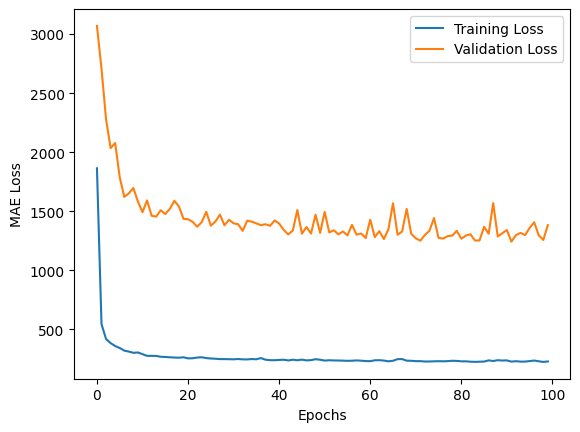

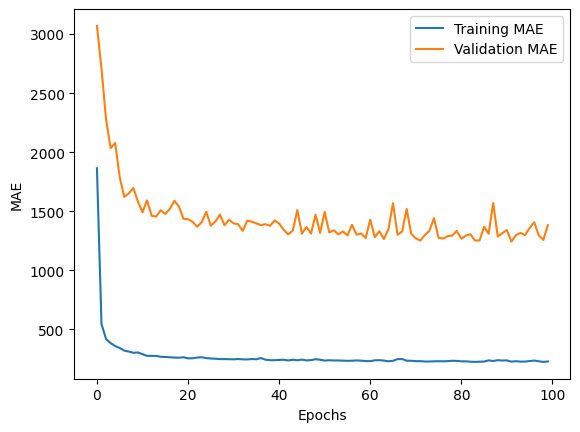

In [59]:
# Eğitimdeki kayıp değerlerini çizin
plt.plot(history_model_3.history['loss'], label='Training Loss')
plt.plot(history_model_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.legend()
plt.show()

# Eğitimdeki metrik değerlerini çizin
plt.plot(history_model_3.history['mae'], label='Training MAE')
plt.plot(history_model_3.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [60]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 1383.0378 - mae: 1383.0378


[1383.037841796875, 1383.037841796875]

In [61]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 1243.2228 - mae: 1243.2228


[1243.2227783203125, 1243.2227783203125]

In [62]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9118.019 , 9522.971 , 9311.442 , 9642.771 , 9725.981 , 9799.181 ,
        9458.933 ],
       [8745.399 , 9158.266 , 8943.662 , 9178.888 , 9335.33  , 9599.787 ,
        9095.3   ],
       [8735.6045, 8815.164 , 9066.686 , 8898.187 , 9170.008 , 9442.991 ,
        9119.241 ],
       [8881.166 , 8904.596 , 9259.866 , 9135.233 , 9236.137 , 9432.282 ,
        9222.847 ],
       [8948.228 , 9039.2   , 9190.975 , 9240.817 , 9217.911 , 9251.635 ,
        9159.839 ]], dtype=float32)>

In [63]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  718.1133  ,   414.73242 ,   429.8623  ,   526.5664  ,
          595.4528  ,   768.77435 ,   784.93585 ,   619.41095 ,
          588.60333 ,   685.29535 ,   898.4433  ,   936.45996 ,
         1033.1288  ,   933.6329  ,   679.7447  ,   285.27762 ,
          172.19914 ,   293.03006 ,   218.40646 ,   273.19467 ,
          157.88615 ,   271.83224 ,   405.78006 ,   340.67767 ,
          230.30113 ,   172.6649  ,    76.201035,   135.46603 ,
          176.1838  ,   249.58643 ,   351.4101  ,   465.40945 ,
          393.50146 ,   387.2258  ,   365.45697 ,   341.99246 ,
          366.36063 ,   287.2894  ,   275.40674 ,   157.12703 ,
          358.72092 ,   110.01576 ,   108.90353 ,   152.60164 ,
          220.82039 ,   200.7306  ,   135.70828 ,   197.95969 ,
          129.94797 ,   152.69588 ,   196.71094 ,   177.4495  ,
          244.43687 ,   284.8904  ,   230.8531  ,   273.51215 ,
          452.60162 ,   453.19107 ,   469.12125 ,   402.93756 ,
          272.4894  ,   201.69092

In [29]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [65]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1243.2227,
 'mse': 5437266.5,
 'rmse': 1431.081,
 'mape': 5.701732,
 'mase': 2.2122452}

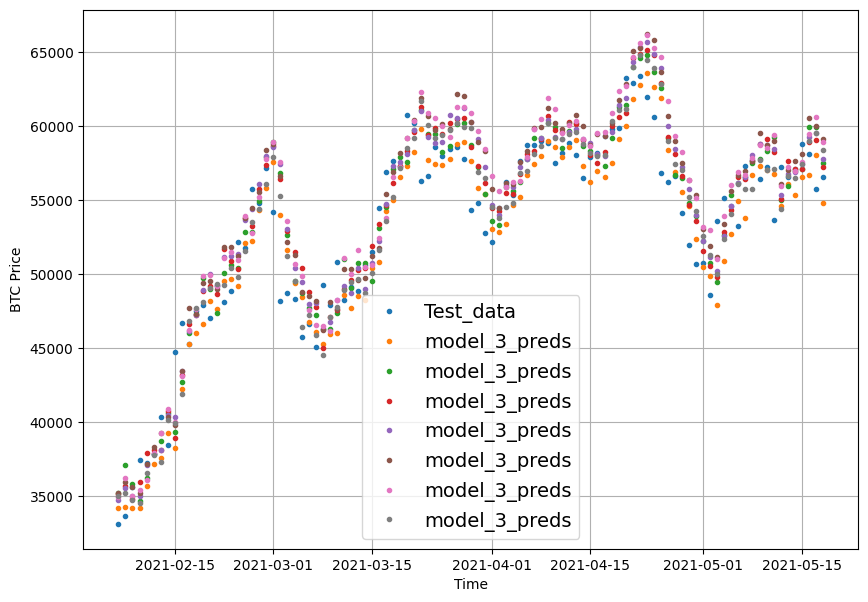

In [66]:
offset = 450
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

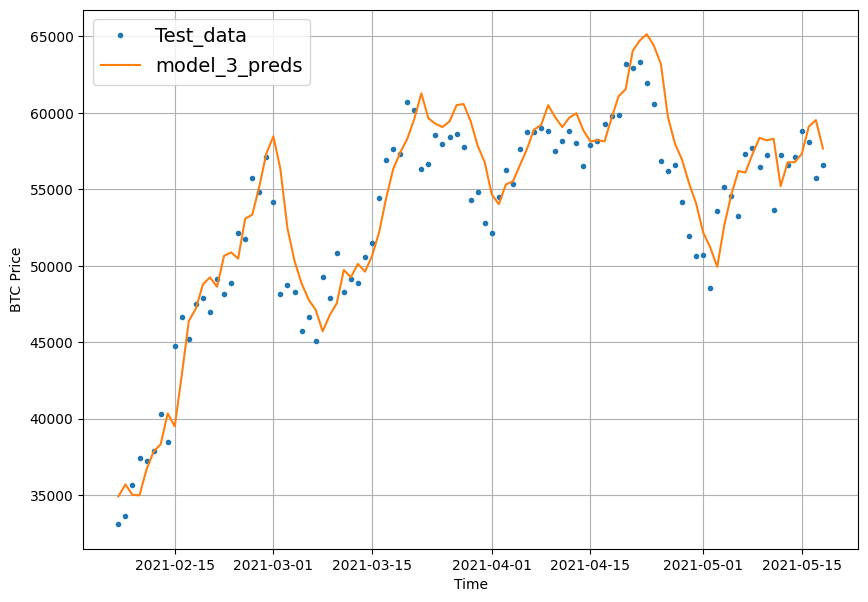

In [67]:
offset = 450
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

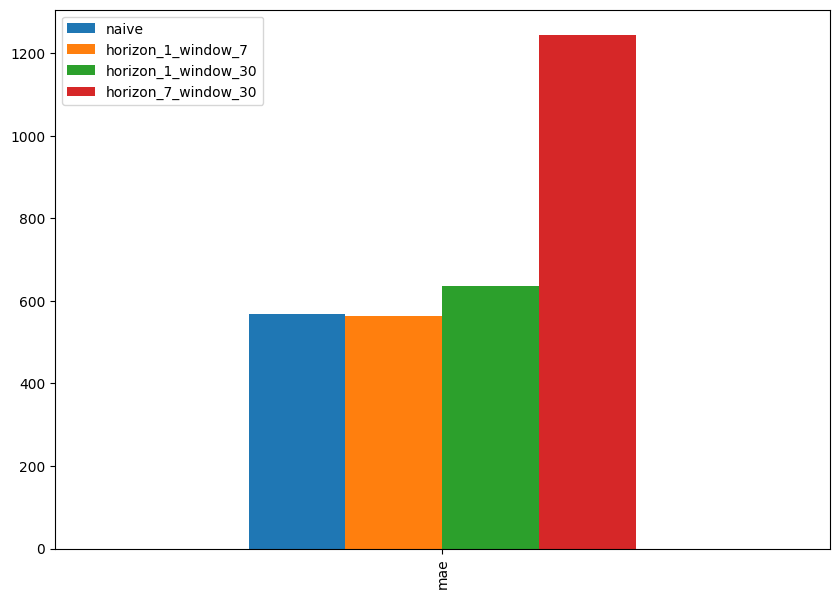

In [68]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

**Model 4: Conv1D**

In [6]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [70]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [71]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [72]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [73]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [74]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit model
history_model_4=model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=10,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1663.7373 - mae: 1663.7373

18/18 [==============================] - 7s 69ms/step - loss: 1663.7373 - mae: 1663.7373 - val_loss: 1453.1409 - val_mae: 1453.1409
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 311.9604 - mae: 311.9604 - val_loss: 1557.0681 - val_mae: 1557.0681
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 225.8493 - mae: 225.8493

18/18 [==============================] - 1s 45ms/step - loss: 221.8881 - mae: 221.8881 - val_loss: 1072.8577 - val_mae: 1072.8577
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 202.5145 - mae: 202.5145

18/18 [==============================] - 1s 45ms/step - loss: 192.9092 - mae: 192.9092 - val_loss: 1041.5079 - val_mae: 1041.5079
Epoch 5/100
16/18 [=========================>....] - ETA: 0s - loss: 189.8416 - mae: 189.8416

18/18 [==============================] - 1s 45ms/step - loss: 186.7568 - mae: 186.7568 - val_loss: 1039.3719 - val_mae: 1039.3719
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 183.8355 - mae: 183.8355

18/18 [==============================] - 1s 69ms/step - loss: 183.8355 - mae: 183.8355 - val_loss: 1035.7302 - val_mae: 1035.7302
Epoch 7/100
10/18 [===============>..............] - ETA: 0s - loss: 200.0180 - mae: 200.0180

18/18 [==============================] - 1s 69ms/step - loss: 183.7137 - mae: 183.7137 - val_loss: 1001.5180 - val_mae: 1001.5180
Epoch 8/100
10/18 [===============>..............] - ETA: 0s - loss: 174.0062 - mae: 174.0062

18/18 [==============================] - 1s 67ms/step - loss: 177.9249 - mae: 177.9249 - val_loss: 997.9398 - val_mae: 997.9398
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 175.7468 - mae: 175.7468 - val_loss: 1009.3448 - val_mae: 1009.3448
Epoch 10/100
14/18 [======================>.......] - ETA: 0s - loss: 169.2863 - mae: 169.2863

18/18 [==============================] - 1s 46ms/step - loss: 173.1524 - mae: 173.1524 - val_loss: 965.2300 - val_mae: 965.2300
Epoch 11/100
16/18 [=========================>....] - ETA: 0s - loss: 168.8653 - mae: 168.8653

18/18 [==============================] - 1s 46ms/step - loss: 170.3655 - mae: 170.3655 - val_loss: 941.6976 - val_mae: 941.6976
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 169.1134 - mae: 169.1134 - val_loss: 987.1530 - val_mae: 987.1530
Epoch 13/100
18/18 [==============================] - 0s 7ms/step - loss: 165.5793 - mae: 165.5793 - val_loss: 947.9388 - val_mae: 947.9388
Epoch 14/100
15/18 [========================>.....] - ETA: 0s - loss: 160.4050 - mae: 160.4050

18/18 [==============================] - 1s 47ms/step - loss: 162.1455 - mae: 162.1455 - val_loss: 923.3026 - val_mae: 923.3026
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 160.7850 - mae: 160.7850 - val_loss: 932.7922 - val_mae: 932.7922
Epoch 16/100
14/18 [======================>.......] - ETA: 0s - loss: 157.1684 - mae: 157.1684

18/18 [==============================] - 1s 47ms/step - loss: 156.7586 - mae: 156.7586 - val_loss: 875.9168 - val_mae: 875.9168
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 154.0702 - mae: 154.0702 - val_loss: 902.7880 - val_mae: 902.7881
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 152.3920 - mae: 152.3920 - val_loss: 890.5176 - val_mae: 890.5176
Epoch 19/100
15/18 [========================>.....] - ETA: 0s - loss: 150.3841 - mae: 150.3841

18/18 [==============================] - 1s 48ms/step - loss: 150.1105 - mae: 150.1105 - val_loss: 839.0011 - val_mae: 839.0011
Epoch 20/100
15/18 [========================>.....] - ETA: 0s - loss: 147.9834 - mae: 147.9834

18/18 [==============================] - 1s 47ms/step - loss: 146.7479 - mae: 146.7479 - val_loss: 821.3214 - val_mae: 821.3214
Epoch 21/100
13/18 [====================>.........] - ETA: 0s - loss: 144.9385 - mae: 144.9385

18/18 [==============================] - 1s 44ms/step - loss: 145.4135 - mae: 145.4135 - val_loss: 794.6188 - val_mae: 794.6188
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 142.4247 - mae: 142.4247 - val_loss: 809.6573 - val_mae: 809.6573
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 138.2912 - mae: 138.2912

18/18 [==============================] - 1s 46ms/step - loss: 139.6383 - mae: 139.6383 - val_loss: 794.5629 - val_mae: 794.5629
Epoch 24/100
16/18 [=========================>....] - ETA: 0s - loss: 138.8144 - mae: 138.8144

18/18 [==============================] - 1s 42ms/step - loss: 138.6242 - mae: 138.6242 - val_loss: 774.8117 - val_mae: 774.8118
Epoch 25/100
16/18 [=========================>....] - ETA: 0s - loss: 139.0903 - mae: 139.0903

18/18 [==============================] - 1s 46ms/step - loss: 135.6923 - mae: 135.6923 - val_loss: 746.3896 - val_mae: 746.3896
Epoch 26/100
13/18 [====================>.........] - ETA: 0s - loss: 130.3922 - mae: 130.3922

18/18 [==============================] - 1s 65ms/step - loss: 133.7623 - mae: 133.7623 - val_loss: 733.1655 - val_mae: 733.1655
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 137.1564 - mae: 137.1564

18/18 [==============================] - 2s 90ms/step - loss: 133.3410 - mae: 133.3410 - val_loss: 726.9383 - val_mae: 726.9383
Epoch 28/100
14/18 [======================>.......] - ETA: 0s - loss: 127.1235 - mae: 127.1235

18/18 [==============================] - 1s 45ms/step - loss: 130.1403 - mae: 130.1403 - val_loss: 715.2524 - val_mae: 715.2524
Epoch 29/100
14/18 [======================>.......] - ETA: 0s - loss: 128.4122 - mae: 128.4122

18/18 [==============================] - 1s 46ms/step - loss: 128.2931 - mae: 128.2931 - val_loss: 714.0240 - val_mae: 714.0240
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 131.3338 - mae: 131.3338 - val_loss: 852.7665 - val_mae: 852.7665
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 138.8248 - mae: 138.8248 - val_loss: 753.6306 - val_mae: 753.6306
Epoch 32/100
13/18 [====================>.........] - ETA: 0s - loss: 133.1047 - mae: 133.1047

18/18 [==============================] - 1s 45ms/step - loss: 131.1329 - mae: 131.1329 - val_loss: 690.2937 - val_mae: 690.2937
Epoch 33/100
 9/18 [==============>...............] - ETA: 0s - loss: 130.2954 - mae: 130.2954

18/18 [==============================] - 1s 50ms/step - loss: 127.9095 - mae: 127.9095 - val_loss: 676.3482 - val_mae: 676.3482
Epoch 34/100
15/18 [========================>.....] - ETA: 0s - loss: 122.2845 - mae: 122.2845

18/18 [==============================] - 1s 47ms/step - loss: 122.9384 - mae: 122.9384 - val_loss: 671.8801 - val_mae: 671.8801
Epoch 35/100
11/18 [=================>............] - ETA: 0s - loss: 125.6994 - mae: 125.6994

18/18 [==============================] - 1s 49ms/step - loss: 121.9030 - mae: 121.9030 - val_loss: 666.2531 - val_mae: 666.2531
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 124.4226 - mae: 124.4226 - val_loss: 727.4556 - val_mae: 727.4556
Epoch 37/100
15/18 [========================>.....] - ETA: 0s - loss: 124.8127 - mae: 124.8127

18/18 [==============================] - 1s 48ms/step - loss: 122.5513 - mae: 122.5513 - val_loss: 651.3237 - val_mae: 651.3237
Epoch 38/100
14/18 [======================>.......] - ETA: 0s - loss: 124.0191 - mae: 124.0191

18/18 [==============================] - 1s 47ms/step - loss: 120.4171 - mae: 120.4171 - val_loss: 647.1122 - val_mae: 647.1122
Epoch 39/100
18/18 [==============================] - 0s 7ms/step - loss: 119.8880 - mae: 119.8880 - val_loss: 662.1126 - val_mae: 662.1126
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 118.1140 - mae: 118.1140 - val_loss: 652.2610 - val_mae: 652.2610
Epoch 41/100
16/18 [=========================>....] - ETA: 0s - loss: 120.9913 - mae: 120.9913

18/18 [==============================] - 1s 47ms/step - loss: 118.8343 - mae: 118.8343 - val_loss: 634.5991 - val_mae: 634.5991
Epoch 42/100
18/18 [==============================] - 0s 7ms/step - loss: 120.0777 - mae: 120.0777 - val_loss: 636.5345 - val_mae: 636.5345
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 116.3366 - mae: 116.3366 - val_loss: 635.4794 - val_mae: 635.4794
Epoch 44/100
14/18 [======================>.......] - ETA: 0s - loss: 113.9959 - mae: 113.9959

18/18 [==============================] - 1s 48ms/step - loss: 117.3326 - mae: 117.3326 - val_loss: 627.1547 - val_mae: 627.1547
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 117.6069 - mae: 117.6069 - val_loss: 631.9129 - val_mae: 631.9129
Epoch 46/100
14/18 [======================>.......] - ETA: 0s - loss: 120.1733 - mae: 120.1733

18/18 [==============================] - 1s 84ms/step - loss: 117.0776 - mae: 117.0776 - val_loss: 619.0407 - val_mae: 619.0407
Epoch 47/100
18/18 [==============================] - 0s 12ms/step - loss: 117.3665 - mae: 117.3665 - val_loss: 672.3938 - val_mae: 672.3938
Epoch 48/100
18/18 [==============================] - 0s 10ms/step - loss: 114.9742 - mae: 114.9742 - val_loss: 621.1694 - val_mae: 621.1694
Epoch 49/100
18/18 [==============================] - 0s 10ms/step - loss: 115.4210 - mae: 115.4210 - val_loss: 619.2559 - val_mae: 619.2559
Epoch 50/100
18/18 [==============================] - 0s 11ms/step - loss: 116.0796 - mae: 116.0796 - val_loss: 620.2012 - val_mae: 620.2012
Epoch 51/100
10/18 [===============>..............] - ETA: 0s - loss: 111.1387 - mae: 111.1387

18/18 [==============================] - 1s 59ms/step - loss: 114.2079 - mae: 114.2079 - val_loss: 615.3900 - val_mae: 615.3900
Epoch 52/100
18/18 [==============================] - 0s 7ms/step - loss: 115.0440 - mae: 115.0440 - val_loss: 617.1740 - val_mae: 617.1740
Epoch 53/100
15/18 [========================>.....] - ETA: 0s - loss: 116.6343 - mae: 116.6343

18/18 [==============================] - 1s 47ms/step - loss: 116.1976 - mae: 116.1976 - val_loss: 609.3091 - val_mae: 609.3091
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 113.8301 - mae: 113.8301 - val_loss: 611.2973 - val_mae: 611.2973
Epoch 55/100
16/18 [=========================>....] - ETA: 0s - loss: 119.5092 - mae: 119.5092

18/18 [==============================] - 1s 47ms/step - loss: 116.0057 - mae: 116.0057 - val_loss: 602.8292 - val_mae: 602.8292
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 114.1734 - mae: 114.1734 - val_loss: 811.3579 - val_mae: 811.3579
Epoch 57/100
15/18 [========================>.....] - ETA: 0s - loss: 142.0972 - mae: 142.0972

18/18 [==============================] - 1s 45ms/step - loss: 139.3817 - mae: 139.3817 - val_loss: 598.5437 - val_mae: 598.5437
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 121.3190 - mae: 121.3190 - val_loss: 632.5284 - val_mae: 632.5284
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 111.5572 - mae: 111.5572 - val_loss: 615.2446 - val_mae: 615.2446
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 113.2784 - mae: 113.2784 - val_loss: 615.4713 - val_mae: 615.4713
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 112.4953 - mae: 112.4953 - val_loss: 600.7020 - val_mae: 600.7020
Epoch 62/100
15/18 [========================>.....] - ETA: 0s - loss: 113.5985 - mae: 113.5985

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

# Eğitimdeki kayıp değerlerini çizin
plt.plot(history_model_4.history['loss'], label='Training Loss')
plt.plot(history_model_4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.legend()
plt.show()

# Eğitimdeki metrik değerlerini çizin
plt.plot(history_model_4.history['mae'], label='Training MAE')
plt.plot(history_model_4.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
model_4.summary()

In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results


**Model 5: RNN (LSTM)**

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu", return_sequences=True)(x)# using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
x = layers.LSTM(64, activation="relu", return_sequences=True)(x)
x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
history_model_5=model_5.fit(train_windows,
            train_labels,
            epochs=10,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

**# FARKLI BİR ŞEKİLDE KODLANMIŞ LSTM**

In [ ]:
tf.random.set_seed(42)

# Create model
model_90 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # reshape the inputs to be compatible with LSTM
  layers.LSTM(128, activation="relu", return_sequences=True),
  layers.LSTM(64, activation="relu", return_sequences=True),
  layers.LSTM(32, activation="relu"),
  layers.Dense(HORIZON)
], name="model_90_Deneme_lstm")

# Compile model
model_90.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit model
history_model_90 = model_90.fit(train_windows,
                             train_labels,
                             batch_size=128,
                             epochs=10,
                             verbose=1,
                             validation_data=(test_windows, test_labels),
                             callbacks=[create_model_checkpoint(model_name=model_90.name)])


In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

In [ ]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

In [ ]:
# Eğitimdeki kayıp değerlerini çizin
plt.plot(history_model_5.history['loss'], label='Training Loss')
plt.plot(history_model_5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.legend()
plt.show()

# Eğitimdeki metrik değerlerini çizin
plt.plot(history_model_5.history['mae'], label='Training MAE')
plt.plot(history_model_5.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
offset = 450
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look further ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
values = tf.reduce_mean(model_5_preds)  # Ortalama değeri alıyoruz
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_5_preds,  # Sadece bu değişikliği yaparak `model_5_preds` tensörünü direkt olarak kullanıyoruz
                 format="-",
                 start=offset,
                 label="model_5_preds")

**Make a multivariate time series**

In [48]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [49]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [50]:
# burada iki sütun arası gün farkına bakıldı
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [51]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


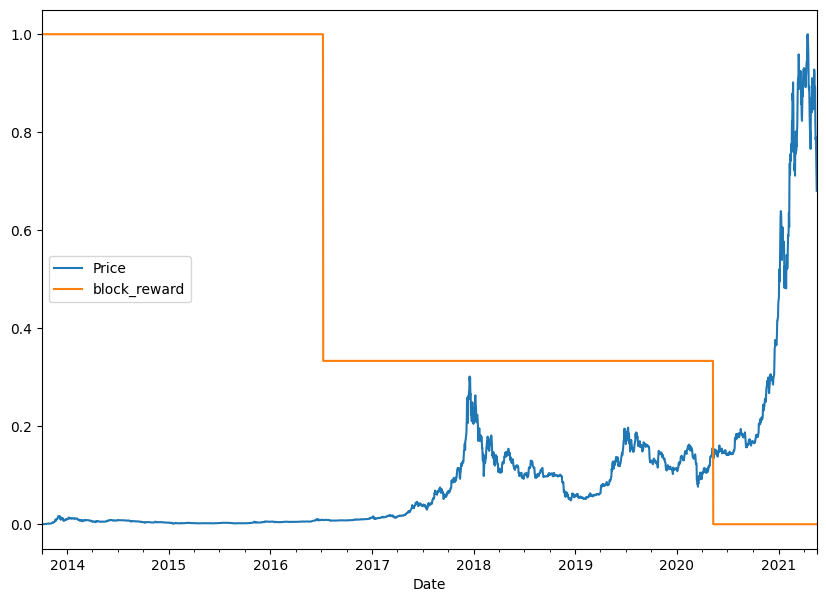

In [52]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

**Daha önceki kodlar çalışmaz çok değişkenli oldğu için onun için SHIFT yöntemi kullanılır**

In [53]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [54]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [55]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors          "KISACA PRİCE->Y PRİCE HARİÇ->X"
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [56]:
# View labels
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [99]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [100]:
# Building a multivariate Model

tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
history_model_6=model_6.fit(X_train, y_train,
            epochs=10,
            batch_size=128,
            verbose=1, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/10
17/18 [===========================>..] - ETA: 0s - loss: 251.4895 

18/18 [==============================] - 2s 46ms/step - loss: 248.9766 - val_loss: 964.2504
Epoch 2/10
17/18 [===========================>..] - ETA: 0s - loss: 170.9789

18/18 [==============================] - 1s 39ms/step - loss: 168.8417 - val_loss: 775.9341
Epoch 3/10
18/18 [==============================] - 0s 6ms/step - loss: 143.2680 - val_loss: 808.0782
Epoch 4/10
18/18 [==============================] - ETA: 0s - loss: 148.8541

18/18 [==============================] - 1s 38ms/step - loss: 148.8541 - val_loss: 754.3790
Epoch 5/10
17/18 [===========================>..] - ETA: 0s - loss: 129.2656

18/18 [==============================] - 1s 40ms/step - loss: 128.0395 - val_loss: 738.8947
Epoch 6/10
18/18 [==============================] - ETA: 0s - loss: 120.4947

18/18 [==============================] - 1s 38ms/step - loss: 120.4947 - val_loss: 673.3541
Epoch 7/10
18/18 [==============================] - 0s 6ms/step - loss: 117.1601 - val_loss: 735.0745
Epoch 8/10
18/18 [==============================] - 0s 5ms/step - loss: 122.7246 - val_loss: 793.6373
Epoch 9/10
18/18 [==============================] - 0s 6ms/step - loss: 114.3004 - val_loss: 899.1005
Epoch 10/10
18/18 [==============================] - 0s 4ms/step - loss: 148.0413 - val_loss: 773.0297


In [101]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 673.3540


673.35400390625

In [102]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8842.713, 8675.686, 8813.427, 8694.875, 8617.002, 8622.882,
       8560.973, 8444.569, 8346.529, 8380.576], dtype=float32)>

In [103]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 673.354,
 'mse': 1441786.6,
 'rmse': 1200.7443,
 'mape': 3.0624292,
 'mase': 1.1828965}

**MODEL 7 N-BEATS**

In [3]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [7]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [8]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [9]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19096775 -0.60605645 -0.08195248 -0.14041081 -0.00648142 -0.32739967
 -0.09432331]
Forecast: 0.17817422747612


Preparing data for the N-BEATS algorithm

In [10]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [17]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [18]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [19]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [20]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [21]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [22]:
from tensorflow.keras import layers
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:

 %%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=1, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

In [24]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 35ms/step - loss: 582.9979 - mae: 582.9979 - mse: 1206936.3750


[582.9979248046875, 582.9979248046875, 1206936.375]

In [27]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8900.459 , 8850.447 , 9018.389 , 8792.348 , 8825.298 , 8760.3125,
       8675.514 , 8556.866 , 8513.6455, 8526.368 ], dtype=float32)>

In [32]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 582.9979,
 'mse': 1206936.4,
 'rmse': 1098.6066,
 'mape': 2.6606326,
 'mase': 1.0241659}

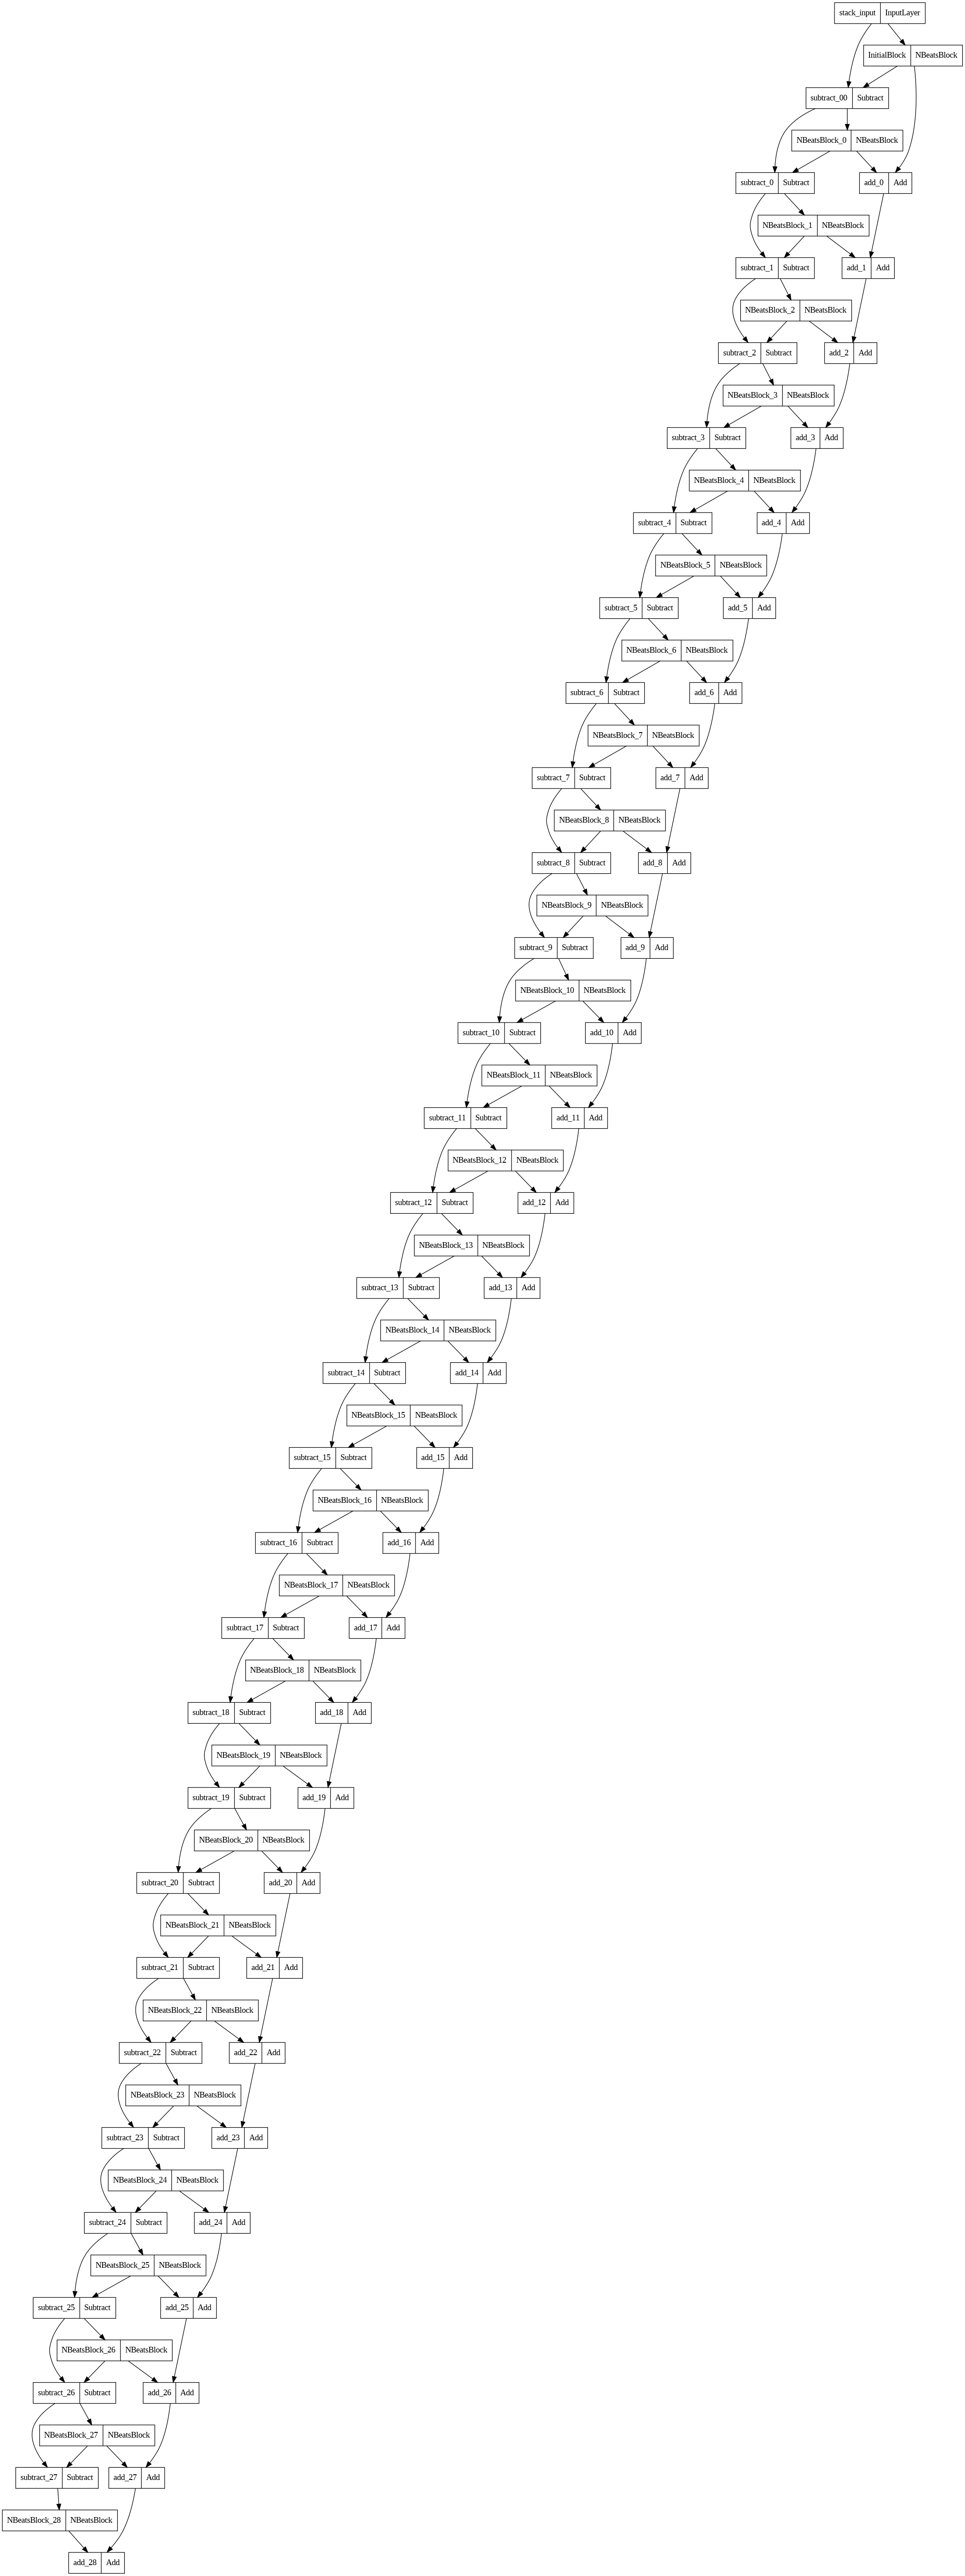

In [33]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [34]:
# This will error out unless a "get_config()" method is implemented - this could be extra curriculum
model_7.save(model_7.name)

**Ensemble Model**

In [35]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=1,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models


In [36]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=50)

Optimizing model by reducing: mae for 50 epochs, model number: 0
Optimizing model by reducing: mse for 50 epochs, model number: 0
Optimizing model by reducing: mape for 50 epochs, model number: 0
Optimizing model by reducing: mae for 50 epochs, model number: 1
Optimizing model by reducing: mse for 50 epochs, model number: 1
Optimizing model by reducing: mape for 50 epochs, model number: 1
Optimizing model by reducing: mae for 50 epochs, model number: 2
Optimizing model by reducing: mse for 50 epochs, model number: 2
Optimizing model by reducing: mape for 50 epochs, model number: 2
Optimizing model by reducing: mae for 50 epochs, model number: 3
Optimizing model by reducing: mse for 50 epochs, model number: 3
Optimizing model by reducing: mape for 50 epochs, model number: 3
Optimizing model by reducing: mae for 50 epochs, model number: 4
Optimizing model by reducing: mse for 50 epochs, model number: 4
Optimizing model by reducing: mape for 50 epochs, model number: 4
CPU times: user 48.9

In [37]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [38]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 71ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8975.939,  8796.166,  8984.986, ..., 49659.926, 48486.473,
        48039.496],
       [ 8962.568,  8935.866,  8970.285, ..., 50788.184, 48506.234,
        47336.152],
       [ 9052.072,  8892.717,  9248.331, ..., 50769.375, 49543.453,
        45127.06 ],
       ...,
       [ 8784.635,  8888.745,  9095.065, ..., 50925.62 , 47672.797,
        46493.914],
       [ 8965.996,  8763.585,  8985.381, ..., 49039.496, 50248.812,
        46906.11 ],
       [ 8983.31 ,  8903.035,  9204.303, ..., 51584.93 , 50129.15 ,
        47517.145]], dtype=float32)>

In [41]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 605.2006,
 'mse': 1271134.9,
 'rmse': 1127.4462,
 'mape': 2.7507918,
 'mase': 1.0631698}

In [42]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

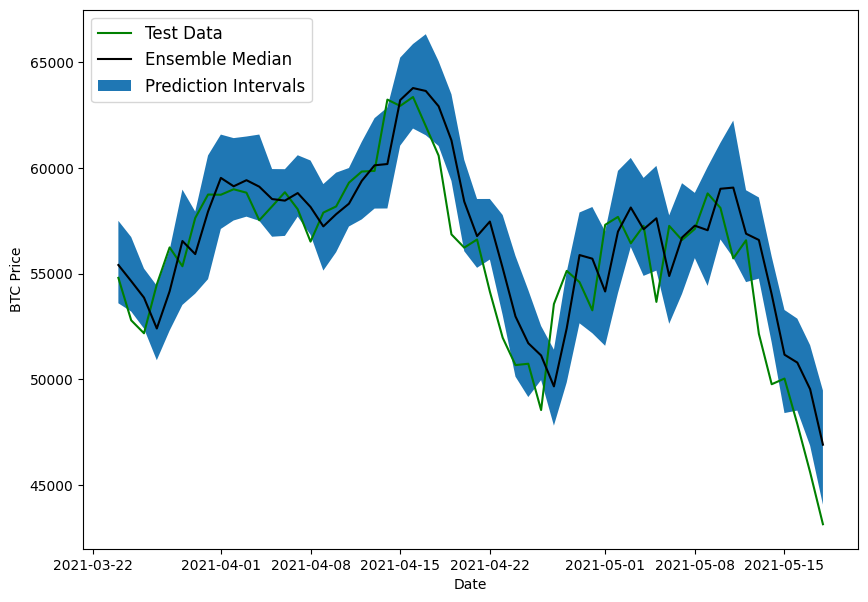

In [44]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=12);

**Model 9: Train a model on the full historical data to make predictions into future**

In [57]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [58]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [61]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=1) # don't print out anything, we've seen this all before

In [83]:
# How many timesteps to predict into the future?
INTO_FUTURE = 606 # since our Bitcoin data is daily, this is for 14 days

In [64]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

In [86]:
future_forecast[:10]

[55980.406,
 50584.21,
 49496.65,
 49334.164,
 46336.785,
 46052.336,
 46874.516,
 54794.61,
 49513.64,
 49115.492]

In [67]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [87]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

In [ ]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

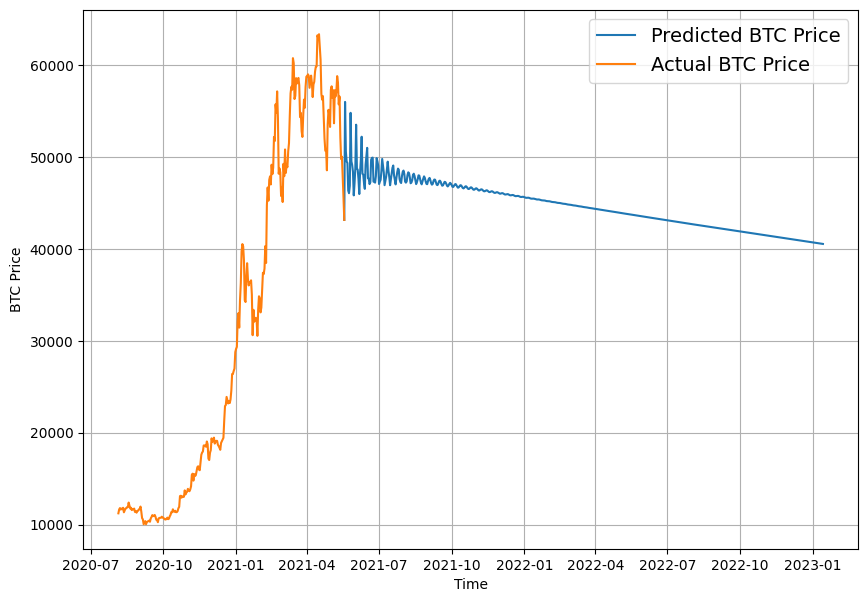

In [91]:
# Plot future price predictions of Bitcoin
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")

**Model 10-Turkey Problem**

In [92]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [94]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [95]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

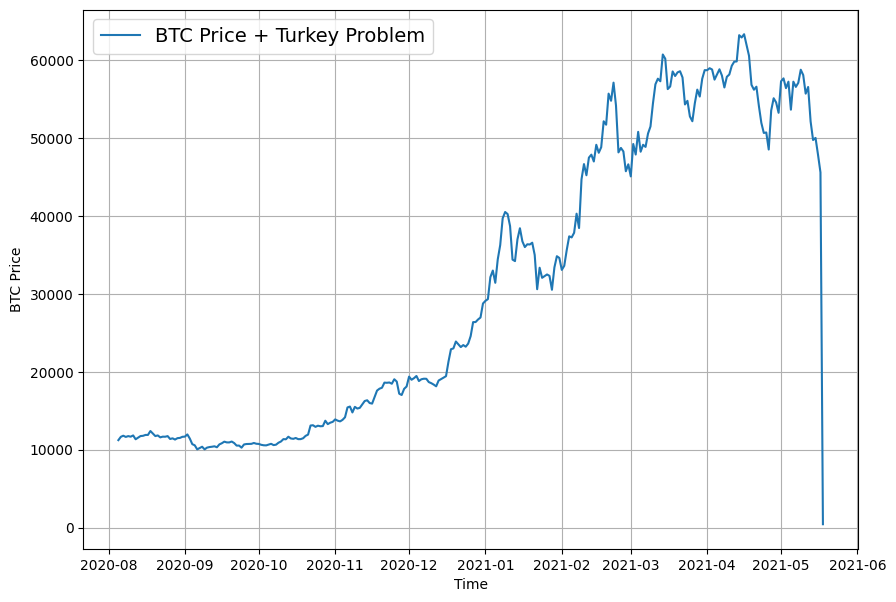

In [96]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [103]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [118]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [119]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 650.7376


650.7376098632812

In [120]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 640.4848


640.4848022460938

In [121]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8812.694, 8762.549, 9027.351, 8741.661, 8728.252, 8720.906,
       8653.601, 8515.323, 8431.173, 8518.544], dtype=float32)>

In [122]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17130.586,
 'mse': 614501250.0,
 'rmse': 23715.8,
 'mape': 121.36588,
 'mase': 26.50964}

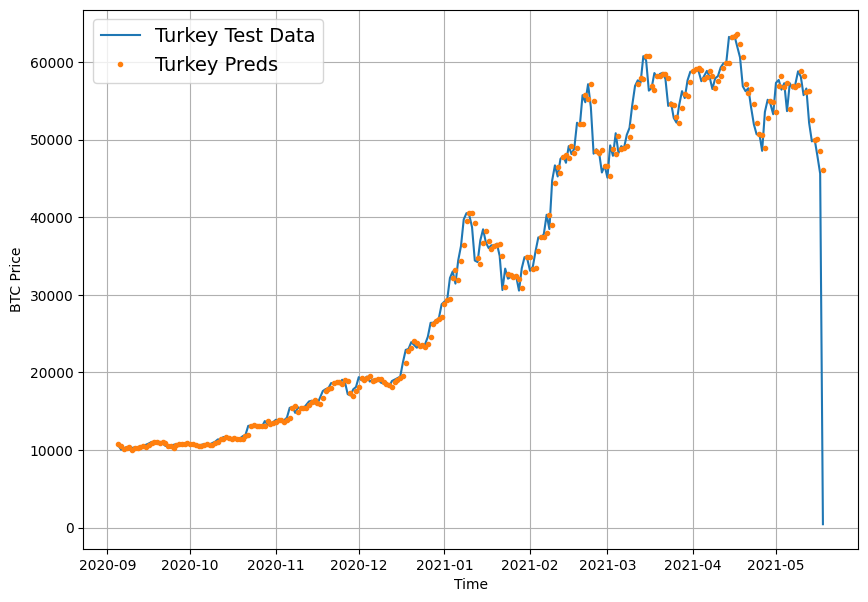

In [123]:

plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");